<a href="https://colab.research.google.com/github/jcardonamde/Analyzing_customers_with_MLandDeepLearning/blob/main/Analyzing_customers_with_MLandDeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Riesgo de crédito**

## **Problem:**

A bank in India would like to get a better understanding of customers who apply for loans.  They would like you to 

1. Segment the customers into groups of similar customers and report on those groups, and 
2. Create a model that can classify customers into high and low risk groups.  

They have provided a database of current customers labeled with whether they are a high or low risk loan candidate.

<br>

**Data notes:**

Income units are in Indian Rupees.

## **Part 1: Clustering Instructions:**

The bank would like you to segment customers into 2-10 clusters and analyze those clusters.  They have provided you with some data to use for this segmentation.

### 1. Load this dataset for clustering

In [1]:
# Importamos las bibliotecas requeridas para la primera parte
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

Obtenemos la carga del set de datos y analizamos inicialmente estos datos antes de segmentar con base al agrupamiento que se requiere en el ejercicio

In [2]:
# Importamos el set de datos y lo visualizamos en un DataFrame
clients = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Codificación de Dojo/Semana12/Belt Exam/loan_cluster_df.csv')
clients.head()

,Income,Age,Experience,Married,Owns_House,Owns_Car,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,3635824,56,8,0,0,0,8,13,1
1,3231341,47,6,1,0,0,6,14,0
2,7430695,59,8,0,0,0,8,10,0
3,8688710,47,1,0,0,0,1,10,0
4,2229190,21,11,0,0,0,9,11,0


### 2. Explore the data and clean as needed.

In [3]:
# Verifico la nomenclatura de las columnas en caso de poseer algún espaciado y que no vaya a influir en errores de mis próximas validaciones
clients.columns

Index(['Income', 'Age', 'Experience', 'Married', 'Owns_House', 'Owns_Car',
       'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Risk_Flag'],
      dtype='object')

In [4]:
# Renombro las columnas de Current para que mantengan el formato de las demas
clients.columns = ['Income', 'Age', 'Experience', 'Married', 'Owns_House', 'Owns_Car', 'Current_Job_Yrs', 'Current_House_Yrs', 'Risk_Flag']
clients.columns

Index(['Income', 'Age', 'Experience', 'Married', 'Owns_House', 'Owns_Car',
       'Current_Job_Yrs', 'Current_House_Yrs', 'Risk_Flag'],
      dtype='object')

In [5]:
# Inicialmente identifico la forma del set de datos
clients.shape

(19438, 9)

Con lo anterior puedo entender que este set de datos se compone de 19.438 filas y 9 columnas. Posteriormente, voy a identificar los tipos de datos que componen cada columna al igual si se tienen valores faltantes.

In [6]:
# Reviso el número y tipo de dato por Columna, al igual que los datos faltantes que se tengan
print(clients.info(), '\n')
print(clients.isna().sum(), '\n')
print(clients.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19438 entries, 0 to 19437
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Income             19438 non-null  int64
 1   Age                19438 non-null  int64
 2   Experience         19438 non-null  int64
 3   Married            19438 non-null  int64
 4   Owns_House         19438 non-null  int64
 5   Owns_Car           19438 non-null  int64
 6   Current_Job_Yrs    19438 non-null  int64
 7   Current_House_Yrs  19438 non-null  int64
 8   Risk_Flag          19438 non-null  int64
dtypes: int64(9)
memory usage: 1.3 MB
None 

Income               0
Age                  0
Experience           0
Married              0
Owns_House           0
Owns_Car             0
Current_Job_Yrs      0
Current_House_Yrs    0
Risk_Flag            0
dtype: int64 

Income               int64
Age                  int64
Experience           int64
Married              int64
Owns_House 

Puedo ver que en el set de datos cada columna tiene valores completos. No se tienen datos faltantes y que las columnas de datos son de tipo numérico, como int64.

In [7]:
# Identifico cual es la cantidad de datos duplicados y en caso de existir poderlos depurar
clients.duplicated()
clients.duplicated().sum()

10463

Se tienen 10.463 filas duplicadas. Me encuentro que este es un número muy elevado frente al total de datos que tengo mi set. 

Pues 10.463 filas representan el 53.82% del total de filas que al momento tengo (19.438) por columna. Ya conociendo esto considero que depurar no es la opción más correcta basándome en las leyes de limpieza de los datos, por lo que seguiré indagando en el set de datos para encontrar una explicación del porqué de los duplicados.

In [8]:
# Inicialmente, examino el número de valores únicos entre las columnas con las cuales estoy trabajando
clients.nunique()

Income               8326
Age                    59
Experience             21
Married                 2
Owns_House              2
Owns_Car                2
Current_Job_Yrs        15
Current_House_Yrs       5
Risk_Flag               2
dtype: int64

Veo que pocas columnas tienen un número elevado de datos únicos y que la gran mayoria tienen pocos datos unicos. Esto me llama la atención, ya que puede me permitir tener claridad frente al por que se tiene representación de tantos datos duplicados, los revisaré para ver si no hay anomalías.

Entendiendo que toda la composición del set de datos es de categoría numérica, me gustaría visualizar inicialmente la descripción estadística que está relacionada con los datos.

In [9]:
# Mostramos con la función describe, todas las estadísticas de las columnas, para obtener valores mínimos, máximos, media, conteo, entre otros valores
clients.describe()

,Income,Age,Experience,Married,Owns_House,Owns_Car,Current_Job_Yrs,Current_House_Yrs,Risk_Flag
count,1.943800e+04,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000
mean,5.043779e+06,49.812635,10.137926,0.105103,0.052629,0.302706,6.370408,11.994495,0.123315
std,2.885391e+06,16.967994,5.985557,0.306695,0.223297,0.459441,3.630409,1.405133,0.328807
min,1.031000e+04,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000
25%,2.533055e+06,35.000000,5.000000,0.000000,0.000000,0.000000,4.000000,11.000000,0.000000
50%,5.046888e+06,50.000000,10.000000,0.000000,0.000000,0.000000,6.000000,12.000000,0.000000
75%,7.532549e+06,64.000000,15.000000,0.000000,0.000000,1.000000,9.000000,13.000000,0.000000
max,9.999180e+06,79.000000,20.000000,1.000000,1.000000,1.000000,14.000000,14.000000,1.000000


Veo que algunas columnas tienen 0 como su valor mínimo, pero revisando las estadísticas no sería algo malo, pues en su valor máximo tienen como valor el 1. Por lo que me permite interpretar que son valores para categorizar.

Por ejemplo, si una persona está o no casada, si una persona es dueña de vehículos o no, si es dueña de una casa o no, si es tiene alerta de riesgo o no. En otros casos como la columna Experience o Current_House_Yrs. Si tiene lógica, pues un valor en cero puede representar que la persona no tenga experiencia o más de un año en su empleo actual.

In [10]:
# Reviso la composición de valores por dato único en la columna Age
clients['Age'].value_counts()

41    404
27    396
54    393
45    389
48    386
53    381
47    378
25    374
33    373
66    370
68    369
50    368
35    361
60    359
72    352
69    352
76    352
30    350
58    348
55    346
59    339
57    338
37    336
63    336
22    334
42    332
31    331
70    328
34    327
78    327
21    327
23    326
49    326
62    324
24    322
79    321
26    320
43    318
40    315
64    314
77    311
67    310
29    308
61    301
28    301
39    301
74    296
75    296
36    292
46    292
71    288
52    286
32    282
73    282
56    280
44    278
38    277
65    277
51    238
Name: Age, dtype: int64

Para mejor interpretación generare un gráfico de la columna

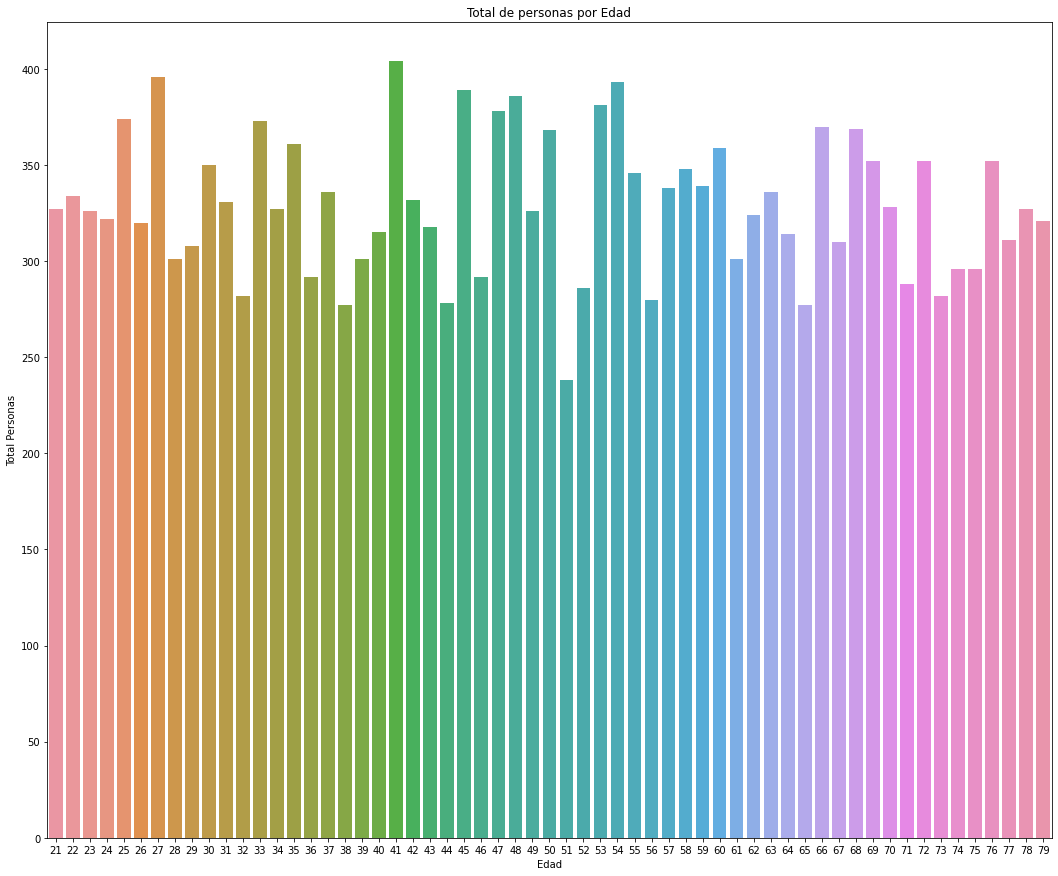

In [11]:
# Creo gráfico de barras para visualizar 
fig = plt.figure(figsize=(18,15))
ages = clients['Age'].value_counts()
sns.barplot(x=ages.index, y=ages.values)
plt.xlabel('Edad')
plt.ylabel('Total Personas')
plt.title("Total de personas por Edad")
plt.show()

El anterior gráfico me permite ver que el rango de edades esta entre un comportamiento aceptable, considerando a lo que hace referencia la composición de datos.

In [12]:
# Reviso la composición de valores por dato único en la columna Married
clients['Married'].value_counts()

0    17395
1     2043
Name: Married, dtype: int64

Lo anterior me confirma que son valores numéricos agrupados por un número base, y que no representa inconsistencias. Continuo con la siguiente columna.

In [13]:
# Reviso la composición de valores por dato único en la columna Owns_House
clients['Owns_House'].value_counts()

0    18415
1     1023
Name: Owns_House, dtype: int64

Lo anterior me confirma que son valores numéricos agrupados por un número base, y que no representa inconsistencias. Continuo con la siguiente columna.

In [14]:
# Reviso la composición de valores por dato único en la columna Owns_Car
clients['Owns_Car'].value_counts()

0    13554
1     5884
Name: Owns_Car, dtype: int64

Lo anterior me confirma que son valores numéricos agrupados por un número base, y que no representa inconsistencias. Continuo con la siguiente columna.

In [15]:
# Reviso la composición de valores por dato único en la columna Current_House_Yrs
clients['Current_House_Yrs'].value_counts()

11    4079
13    3918
12    3846
14    3811
10    3784
Name: Current_House_Yrs, dtype: int64

Lo anterior me confirma que son valores numéricos agrupados por un número base, y que no representa inconsistencias. Continuo con la siguiente columna.

In [16]:
# Reviso la composición de valores por dato único en la columna Risk_Flag
clients['Risk_Flag'].value_counts()

0    17041
1     2397
Name: Risk_Flag, dtype: int64

Lo anterior me confirma que son valores numéricos agrupados por un número base, y que no representa inconsistencias. Continuo con la siguiente columna.

In [17]:
# Reviso la composición de valores por dato único en la columna Current_Job_Yrs
clients['Current_Job_Yrs'].value_counts()

3     2293
4     2141
5     1913
6     1741
7     1539
8     1510
9     1388
10    1240
11    1086
1      961
2      850
12     846
0      749
13     664
14     517
Name: Current_Job_Yrs, dtype: int64

Para mejor interpretación generare un gráfico de la columna

Número máximo de Años trabajados en el mismo trabajo - 14
Número mínimo de Años trabajados en el mismo trabajo - 0


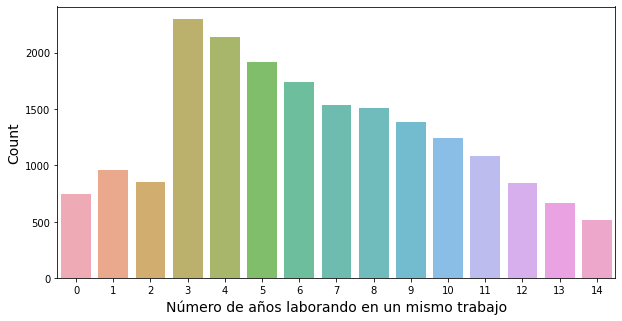

In [18]:
# Explorando la columna Current_Job_Yrs
cjy_count = clients['Current_Job_Yrs']
print(f"Número máximo de Años trabajados en el mismo trabajo - {max(cjy_count)}")
print(f"Número mínimo de Años trabajados en el mismo trabajo - {min(cjy_count)}")

fig = plt.figure(figsize=(10,5))
cjy_count = clients['Current_Job_Yrs'].value_counts()
sns.barplot(x=cjy_count.index, y=cjy_count.values, alpha=0.8)
plt.xlabel('Número de años laborando en un mismo trabajo', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

Me llama la atención el poder identificar cual es el rango de edades de las personas entre las cuales tienen más de 13 años trabajando en su mismo empleo.

Por lo que procedere a realizar un filtro inicial de esta revisión.

In [19]:
# Creo un filtro para posteriormente analizar los demás datos de las personas que tienen filas mas de 13 años trabajando en un mismo trabajo
People_cjy_filter = clients.loc[:, 'Current_Job_Yrs'] >= 13
People_cjy_filter.value_counts()

False    18257
True      1181
Name: Current_Job_Yrs, dtype: int64

Lo anterior me trae una base de 1.181 personas con 13 años o más de experiencia en su mismo empleo. Por lo que procede a visualizar la información para intepretar mejor.

In [20]:
# Visualizamos en un DataFrame estos valores relacionados al filtro de la Columna
clients[People_cjy_filter]

,Income,Age,Experience,Married,Owns_House,Owns_Car,Current_Job_Yrs,Current_House_Yrs,Risk_Flag
15,7153397,49,18,0,0,0,14,10,0
34,1726783,46,16,0,0,1,14,12,1
35,2131115,42,19,0,0,1,14,13,0
44,7653359,57,18,0,0,0,14,10,0
53,452661,51,17,1,0,0,14,10,0
...,...,...,...,...,...,...,...,...,...
19375,4195266,40,20,1,0,0,14,14,0
19378,1140203,50,18,0,0,0,13,13,0
19383,6885928,79,15,1,0,0,13,13,0
19392,4998898,27,13,0,0,0,13,11,0


Veo algo que me llama la atención y es que hay personas por ejemplo con 27 años o 28 años y llevan 13 años en su trabajo actual. No se me hace que tenga mucho sentido pues casi que la persona iniciaria a trabajar desde los 14 o 15 años.

<br>

Asi que me di a la tarea de consultar las leyes laborales en el pais India, de donde son los clientes asociados a dicho banco. Me he encontrado que según la ley los niños que hayan alcanzado la edad de 14 años pueden trabajar. ([Ver Fuente](http://www.ilo.org/public/spanish/standards/relm/gb/docs/gb277/3-2/abol/i1.htm#:~:text=En%20la%20Constituci%C3%B3n%20de%20la,minas%20y%20otros%20empleos%20peligrosos.)).

<br>

Con base a la información anterior he definido entonces que las personas que tengan 26 o menos de 26 años y que tenga 13 o mas años de experiencia en un mismo trabajo no cumplirian dicha condición.

Por lo que reducire el rango aplicando otro filtro.

In [21]:
# Creo un filtro para identificar cuantas personas tienen 26 o menos años y que tienen 13 o más años trabajando en un mismo puesto
People_cjy_filter2 = clients[(clients.Current_Job_Yrs >= 13) & (clients.Age <= 26)]
People_cjy_filter2.sort_values('Age')

,Income,Age,Experience,Married,Owns_House,Owns_Car,Current_Job_Yrs,Current_House_Yrs,Risk_Flag
8909,710851,21,19,0,0,1,14,12,0
4701,7212880,21,17,0,0,0,13,12,1
17969,4591482,21,15,0,1,1,14,10,0
12929,6107468,21,16,0,0,0,13,14,1
11408,4591482,21,15,0,1,1,14,10,0
...,...,...,...,...,...,...,...,...,...
15975,8400754,26,13,0,0,1,13,13,0
8896,894168,26,20,0,0,1,14,14,1
19315,8400754,26,13,0,0,1,13,13,0
2294,8400754,26,13,0,0,1,13,13,0


Por lo que he decidido mejor borrar esta información al ver que son pocas filas y que no representan un cambio muy fuerte dentro del set de datos.

In [22]:
# Procedemos a borrar los indices de las filas asociadas al set de datos que cumplen las condiciones del filtro
clients.drop(clients[(clients.Current_Job_Yrs >= 13) & (clients.Age <= 26)].index, inplace=True)

In [23]:
# Volvemos a aplicar el filtro para validar si aún siguen apareciendo las filas que cumplian con el anterior condicional
People_cjy_filter2 = clients[(clients.Current_Job_Yrs >= 13) & (clients.Age <= 26)]
People_cjy_filter2.count()

Income               0
Age                  0
Experience           0
Married              0
Owns_House           0
Owns_Car             0
Current_Job_Yrs      0
Current_House_Yrs    0
Risk_Flag            0
dtype: int64

Luego de aplicado el anterior tratamiento de datos a estas filas. Procedo a revisar la ultima columna pendiente.

In [24]:
# Reviso la composición de valores por dato único en la columna Experience
clients['Experience'].value_counts()

9     1078
10    1041
12    1005
18     983
1      961
5      946
3      943
15     942
17     941
6      933
4      919
16     914
19     909
14     905
20     893
11     893
13     863
2      850
7      837
8      837
0      749
Name: Experience, dtype: int64

Para mejor interpretación generare un gráfico de la columna

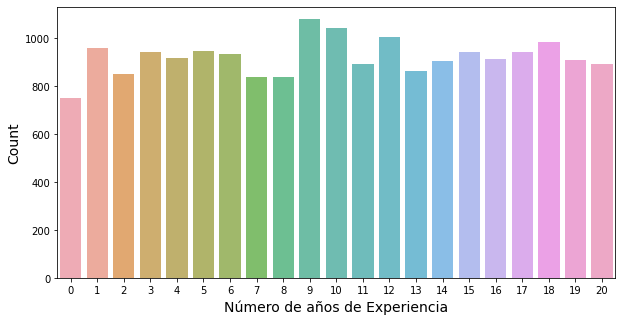

In [25]:
# Explorando la columna Experience
fig = plt.figure(figsize=(10,5))
cjy_count = clients['Experience'].value_counts()
sns.barplot(x=cjy_count.index, y=cjy_count.values, alpha=0.8)
plt.xlabel('Número de años de Experiencia', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

Basándome en el anterior concepto encontrado en el estatuto de ley para el País. Me he basado en que una persona que inicia su vida laboral, desde los 14 años hasta sus 21, ha obtenido 7 años de experiencia. Por lo que revisaré inicialmente la cantidad de personas con más de 8 años experiencia que podrían ser propensos a romper esta lógica. 

In [26]:
# Creo un filtro para posteriormente analizar los demás datos de las personas que tienen filas mas de 13 años trabajando en un mismo trabajo
Experience_filter = clients.loc[:, 'Experience'] >= 8
Experience_filter.value_counts()

True     12204
False     7138
Name: Experience, dtype: int64

In [27]:
# Creo un filtro para identificar las personas con mas de 8 años de Experiencia ordenandolos de menor a mayor edad
clients[Experience_filter].sort_values('Age')

,Income,Age,Experience,Married,Owns_House,Owns_Car,Current_Job_Yrs,Current_House_Yrs,Risk_Flag
15922,4147754,21,18,0,0,0,8,12,0
3665,8420265,21,14,0,1,0,5,13,0
17019,3171323,21,17,0,0,0,5,12,0
18619,1725008,21,17,0,0,0,5,12,0
9763,5764547,21,8,0,0,0,7,10,0
...,...,...,...,...,...,...,...,...,...
12209,971966,79,10,0,0,1,5,12,0
4501,4806237,79,10,1,0,0,4,11,0
11027,4036960,79,16,0,0,1,3,13,1
2838,9270608,79,14,0,0,0,4,12,0


Con base a la información anterior he definido entonces que las personas que no cumplan con que se debe tener al menos 14 años para haber iniciado a trabajar y que su referencia de experiencia cumpla con dicho criterio en cuanto a edad y lógica de adaptabilidad, se depuraran.

Con lo anterior me refiero a que no tendría sentido que una persona tenga 21 años y a su vez posea 18 años de experiencia, por ejemplo. No tendría sentido.

In [28]:
# Procedo a crear un filtro que cumpla el condicional de que una persona no puede tener tanto X años y más de X años de experiencia laboral
Experience_age_filter1 = clients[(clients.Experience >= 8) & (clients.Age == 21)]
Experience_age_filter2 = clients[(clients.Experience >= 9) & (clients.Age == 22)]
Experience_age_filter3 = clients[(clients.Experience >= 10) & (clients.Age == 23)]
Experience_age_filter4 = clients[(clients.Experience >= 11) & (clients.Age == 24)]
Experience_age_filter5 = clients[(clients.Experience >= 12) & (clients.Age == 25)]
Experience_age_filter6 = clients[(clients.Experience >= 13) & (clients.Age == 26)]
Experience_age_filter7 = clients[(clients.Experience >= 14) & (clients.Age == 27)]
Experience_age_filter8 = clients[(clients.Experience >= 15) & (clients.Age == 28)]
Experience_age_filter9 = clients[(clients.Experience >= 16) & (clients.Age == 29)]
Experience_age_filter10 = clients[(clients.Experience >= 17) & (clients.Age == 30)]
Experience_age_filter11 = clients[(clients.Experience >= 18) & (clients.Age == 31)]
Experience_age_filter12 = clients[(clients.Experience >= 19) & (clients.Age == 32)]
Experience_age_filter13 = clients[(clients.Experience >= 20) & (clients.Age == 33)]
people_f1 = Experience_age_filter1.value_counts().sum()
people_f2 = Experience_age_filter2.value_counts().sum()
people_f3 = Experience_age_filter3.value_counts().sum()
people_f4 = Experience_age_filter4.value_counts().sum()
people_f5 = Experience_age_filter5.value_counts().sum()
people_f6 = Experience_age_filter6.value_counts().sum()
people_f7 = Experience_age_filter7.value_counts().sum()
people_f8 = Experience_age_filter8.value_counts().sum()
people_f9 = Experience_age_filter9.value_counts().sum()
people_f10 = Experience_age_filter10.value_counts().sum()
people_f11 = Experience_age_filter11.value_counts().sum()
people_f12 = Experience_age_filter12.value_counts().sum()
people_f13 = Experience_age_filter13.value_counts().sum()

In [29]:
print(f'El numero de personas que cumple el condicional del filtro 1 son: ', people_f1)
print(f'El numero de personas que cumple el condicional del filtro 2 son: ', people_f2)
print(f'El numero de personas que cumple el condicional del filtro 3 son: ', people_f3)
print(f'El numero de personas que cumple el condicional del filtro 4 son: ', people_f4)
print(f'El numero de personas que cumple el condicional del filtro 5 son: ', people_f5)
print(f'El numero de personas que cumple el condicional del filtro 6 son: ', people_f6)
print(f'El numero de personas que cumple el condicional del filtro 7 son: ', people_f7)
print(f'El numero de personas que cumple el condicional del filtro 8 son: ', people_f8)
print(f'El numero de personas que cumple el condicional del filtro 9 son: ', people_f9)
print(f'El numero de personas que cumple el condicional del filtro 10 son: ', people_f10)
print(f'El numero de personas que cumple el condicional del filtro 11 son: ', people_f11)
print(f'El numero de personas que cumple el condicional del filtro 12 son: ', people_f12)
print(f'El numero de personas que cumple el condicional del filtro 13 son: ', people_f13)
print('')
print('El total de filas a depurar cumpliendo las anteriores condiciones, serian: ', people_f1+people_f2+people_f3+people_f4+people_f5+people_f6+people_f7+people_f8+
      people_f9+people_f10+people_f11+people_f12+people_f13)

El numero de personas que cumple el condicional del filtro 1 son:  182
El numero de personas que cumple el condicional del filtro 2 son:  180
El numero de personas que cumple el condicional del filtro 3 son:  156
El numero de personas que cumple el condicional del filtro 4 son:  145
El numero de personas que cumple el condicional del filtro 5 son:  136
El numero de personas que cumple el condicional del filtro 6 son:  98
El numero de personas que cumple el condicional del filtro 7 son:  135
El numero de personas que cumple el condicional del filtro 8 son:  66
El numero de personas que cumple el condicional del filtro 9 son:  83
El numero de personas que cumple el condicional del filtro 10 son:  96
El numero de personas que cumple el condicional del filtro 11 son:  68
El numero de personas que cumple el condicional del filtro 12 son:  23
El numero de personas que cumple el condicional del filtro 13 son:  30

El total de filas a depurar cumpliendo las anteriores condiciones, serian:  139

Por lo que he decidido mejor borrar esta información al ver que son pocas filas y que no representan un cambio muy fuerte dentro del set de datos.

In [30]:
# Procedemos a borrar los indices de las filas asociadas al set de datos que cumplen las condiciones del filtro
clients.drop(clients[(clients.Experience >= 8) & (clients.Age == 21)].index, inplace=True)
clients.drop(clients[(clients.Experience >= 9) & (clients.Age == 22)].index, inplace=True)
clients.drop(clients[(clients.Experience >= 10) & (clients.Age == 23)].index, inplace=True)
clients.drop(clients[(clients.Experience >= 11) & (clients.Age == 24)].index, inplace=True)
clients.drop(clients[(clients.Experience >= 12) & (clients.Age == 25)].index, inplace=True)
clients.drop(clients[(clients.Experience >= 13) & (clients.Age == 26)].index, inplace=True)
clients.drop(clients[(clients.Experience >= 14) & (clients.Age == 27)].index, inplace=True)
clients.drop(clients[(clients.Experience >= 15) & (clients.Age == 28)].index, inplace=True)
clients.drop(clients[(clients.Experience >= 16) & (clients.Age == 29)].index, inplace=True)
clients.drop(clients[(clients.Experience >= 17) & (clients.Age == 30)].index, inplace=True)
clients.drop(clients[(clients.Experience >= 18) & (clients.Age == 31)].index, inplace=True)
clients.drop(clients[(clients.Experience >= 19) & (clients.Age == 32)].index, inplace=True)
clients.drop(clients[(clients.Experience >= 19) & (clients.Age == 32)].index, inplace=True)
clients.drop(clients[(clients.Experience >= 20) & (clients.Age == 33)].index, inplace=True)

In [31]:
# Volvemos a aplicar el filtro para validar si aún siguen apareciendo las filas que cumplian con los anteriores condicionales
Experience_age_filter1 = clients[(clients.Experience >= 8) & (clients.Age == 21)]
Experience_age_filter2 = clients[(clients.Experience >= 9) & (clients.Age == 22)]
Experience_age_filter3 = clients[(clients.Experience >= 10) & (clients.Age == 23)]
Experience_age_filter4 = clients[(clients.Experience >= 11) & (clients.Age == 24)]
Experience_age_filter5 = clients[(clients.Experience >= 12) & (clients.Age == 25)]
Experience_age_filter6 = clients[(clients.Experience >= 13) & (clients.Age == 26)]
Experience_age_filter7 = clients[(clients.Experience >= 14) & (clients.Age == 27)]
Experience_age_filter8 = clients[(clients.Experience >= 15) & (clients.Age == 28)]
Experience_age_filter9 = clients[(clients.Experience >= 16) & (clients.Age == 29)]
Experience_age_filter10 = clients[(clients.Experience >= 17) & (clients.Age == 30)]
Experience_age_filter11 = clients[(clients.Experience >= 18) & (clients.Age == 31)]
Experience_age_filter12 = clients[(clients.Experience >= 19) & (clients.Age == 32)]
Experience_age_filter13 = clients[(clients.Experience >= 20) & (clients.Age == 33)]
people_f1 = Experience_age_filter1.value_counts().sum()
people_f2 = Experience_age_filter2.value_counts().sum()
people_f3 = Experience_age_filter3.value_counts().sum()
people_f4 = Experience_age_filter4.value_counts().sum()
people_f5 = Experience_age_filter5.value_counts().sum()
people_f6 = Experience_age_filter6.value_counts().sum()
people_f7 = Experience_age_filter7.value_counts().sum()
people_f8 = Experience_age_filter8.value_counts().sum()
people_f9 = Experience_age_filter9.value_counts().sum()
people_f10 = Experience_age_filter10.value_counts().sum()
people_f11 = Experience_age_filter11.value_counts().sum()
people_f12 = Experience_age_filter12.value_counts().sum()
people_f13 = Experience_age_filter13.value_counts().sum()
print(f'El numero de personas que cumple el condicional del filtro 1 son: ', people_f1)
print(f'El numero de personas que cumple el condicional del filtro 2 son: ', people_f2)
print(f'El numero de personas que cumple el condicional del filtro 3 son: ', people_f3)
print(f'El numero de personas que cumple el condicional del filtro 4 son: ', people_f4)
print(f'El numero de personas que cumple el condicional del filtro 5 son: ', people_f5)
print(f'El numero de personas que cumple el condicional del filtro 6 son: ', people_f6)
print(f'El numero de personas que cumple el condicional del filtro 7 son: ', people_f7)
print(f'El numero de personas que cumple el condicional del filtro 8 son: ', people_f8)
print(f'El numero de personas que cumple el condicional del filtro 9 son: ', people_f9)
print(f'El numero de personas que cumple el condicional del filtro 10 son: ', people_f10)
print(f'El numero de personas que cumple el condicional del filtro 11 son: ', people_f11)
print(f'El numero de personas que cumple el condicional del filtro 12 son: ', people_f12)
print(f'El numero de personas que cumple el condicional del filtro 13 son: ', people_f13)

El numero de personas que cumple el condicional del filtro 1 son:  0
El numero de personas que cumple el condicional del filtro 2 son:  0
El numero de personas que cumple el condicional del filtro 3 son:  0
El numero de personas que cumple el condicional del filtro 4 son:  0
El numero de personas que cumple el condicional del filtro 5 son:  0
El numero de personas que cumple el condicional del filtro 6 son:  0
El numero de personas que cumple el condicional del filtro 7 son:  0
El numero de personas que cumple el condicional del filtro 8 son:  0
El numero de personas que cumple el condicional del filtro 9 son:  0
El numero de personas que cumple el condicional del filtro 10 son:  0
El numero de personas que cumple el condicional del filtro 11 son:  0
El numero de personas que cumple el condicional del filtro 12 son:  0
El numero de personas que cumple el condicional del filtro 13 son:  0


In [32]:
# Verifico nuevamente el estado de mi set de datos
clients.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17944 entries, 0 to 19437
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Income             17944 non-null  int64
 1   Age                17944 non-null  int64
 2   Experience         17944 non-null  int64
 3   Married            17944 non-null  int64
 4   Owns_House         17944 non-null  int64
 5   Owns_Car           17944 non-null  int64
 6   Current_Job_Yrs    17944 non-null  int64
 7   Current_House_Yrs  17944 non-null  int64
 8   Risk_Flag          17944 non-null  int64
dtypes: int64(9)
memory usage: 1.4 MB


Luego de la limpieza del set de datos, voy a ver la opción de generar un gráfico para conocer como puedo tener unos primeros análisis a partir del comportamiento visual de dichos datos. Para ello me gustaría iniciar con una identificación de la correlación entre las columnas.

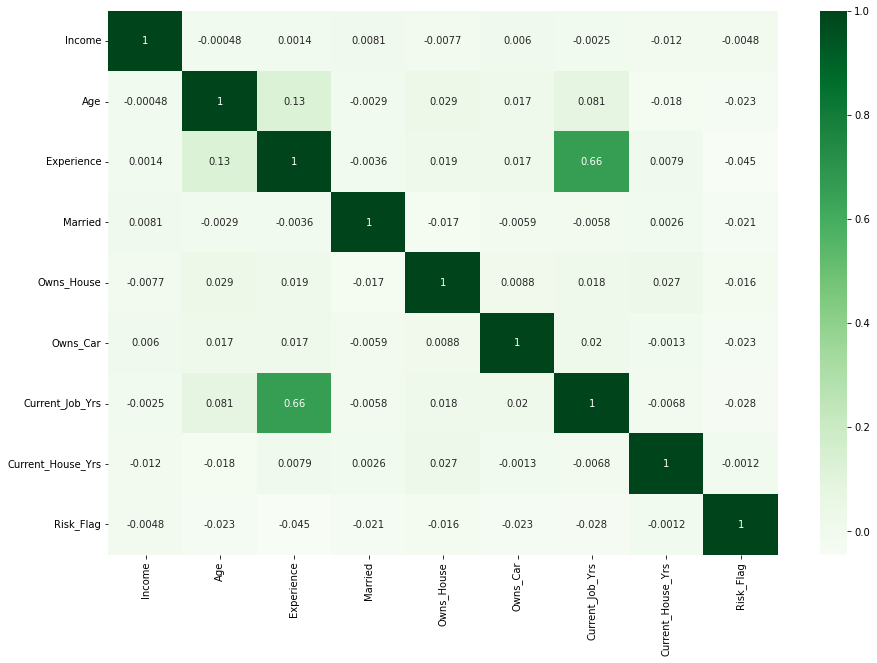

In [33]:
# Se genera gráfico para analizar la posible correlación entre columnas
plt.figure(figsize=(15,10))
import seaborn as sns
corr = clients.corr()
sns.heatmap(corr, cmap = 'Greens', annot = True)
plt.show()

Con base a lo anterior he definido encontrar agrupaciones con base, a la relación entre diferentes características. La correlación mas destacable me muestra un valor de 0.66 la cual se da entre las columnas Current_Job_Yrs y la columna Experience.

### 3. Prepare the data for modeling

Procedemos a escalar los datos para generar un agrupamiento k-medias

In [34]:
# Se escalan los datos. Creo una Instancia para Standard Scaler
scaler = StandardScaler()

# Ajustamos y transformamos la información
# scaled_df = scaler.fit_transform(houses)
X_scaled = pd.DataFrame(scaler.fit_transform(clients), columns=clients.columns)
X_scaled.head()

,Income,Age,Experience,Married,Owns_House,Owns_Car,Current_Job_Yrs,Current_House_Yrs,Risk_Flag
0,-0.487562,0.258496,-0.279419,-0.345241,-0.23683,-0.659243,0.502434,0.715369,2.680000
1,-0.627460,-0.303590,-0.618161,2.896523,-0.23683,-0.659243,-0.051899,1.425868,-0.373134
2,0.824971,0.445859,-0.279419,-0.345241,-0.23683,-0.659243,0.502434,-1.416127,-0.373134
3,1.260081,-0.303590,-1.465016,-0.345241,-0.23683,-0.659243,-1.437733,-1.416127,-0.373134
4,1.244581,-1.302854,-1.126274,-0.345241,-0.23683,-0.659243,-0.883399,-0.705628,-0.373134


Creo gráficos con diferentes dimensiones elegidas dentro de las caracteristicas orientandome en la correlación entre columnas o caracteristicas con posible agrupamiento interesante.

Text(0, 0.5, 'Experience')

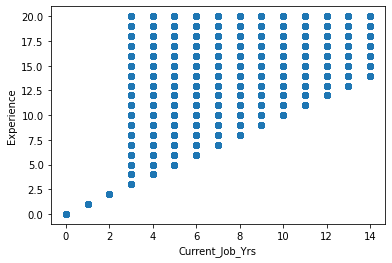

In [35]:
# Visualizamos los datos de este agrupamiento
plt.scatter(clients['Current_Job_Yrs'], clients['Experience'])
plt.xlabel('Current_Job_Yrs')
plt.ylabel('Experience')

Text(0, 0.5, 'Age')

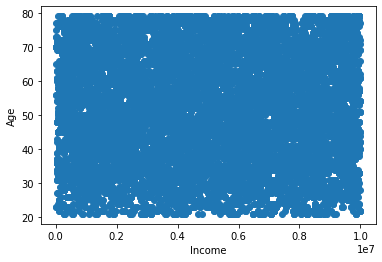

In [36]:
# Visualizamos los datos de este agrupamiento
plt.scatter(clients['Income'], clients['Age'])
plt.xlabel('Income')
plt.ylabel('Age')

Text(0, 0.5, 'Married')

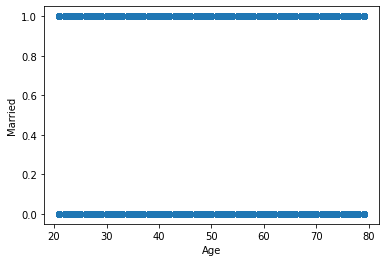

In [37]:
# Visualizamos los datos de este agrupamiento
plt.scatter(clients['Age'], clients['Married'])
plt.xlabel('Age')
plt.ylabel('Married')

Text(0, 0.5, 'Income')

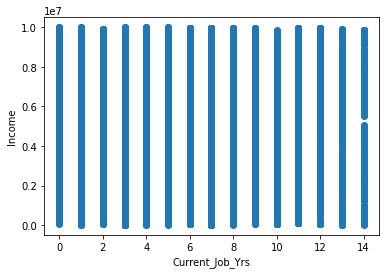

In [38]:
# Visualizamos los datos de este agrupamiento
plt.scatter(clients['Current_Job_Yrs'], clients['Income'])
plt.xlabel('Current_Job_Yrs')
plt.ylabel('Income')

Text(0, 0.5, 'Risk_Flag')

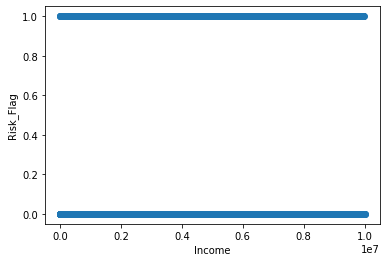

In [39]:
# Visualizamos los datos de este agrupamiento
plt.scatter(clients['Income'], clients['Risk_Flag'])
plt.xlabel('Income')
plt.ylabel('Risk_Flag')

Al momento no tengo claridad de cuantas agrupaciones podría identificar en los gráficos anteriores, por lo que supondré que al momento serían dos clústeres

In [40]:
# Instacio a KMeans en una variable y lo ajusto a los datos escalados
kmeans = KMeans(n_clusters = 2)
kmeans.fit(X_scaled)

KMeans(n_clusters=2)

Procedo a generar el gráfico de agrupamiento para tener mas claridad en iniciar con una mejor identificación de dichos grupos.

Text(0.5, 1.0, 'Clusters de Personas de años en un mismo trabajo relacionado a la Experiencia')

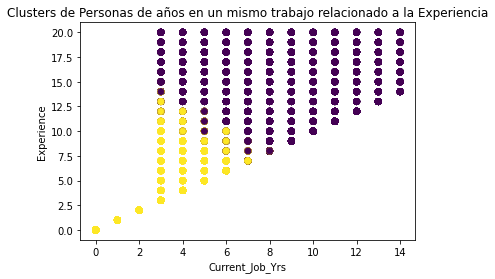

In [41]:
# Guardo los labels de los Clusters en un DataFrame
clients['cluster'] = kmeans.labels_

# Visualizamos los Clusters
plt.scatter(clients['Current_Job_Yrs'], clients['Experience'], c = clients['cluster'])
plt.xlabel('Current_Job_Yrs')
plt.ylabel('Experience')
plt.title('Clusters de Personas de años en un mismo trabajo relacionado a la Experiencia')

### 4. Use a KMeans model to cluster the houses into an optimal number of clusters.

* Use an elbow plot and silhouette score to find the optimal number of clusters.
* There must be between 2 and 10 clusters.
* Explain your choice of number of clusters.

Se encajan modos de k-medias con diferentes números de clústeres para identificar cuántos son los óptimos.

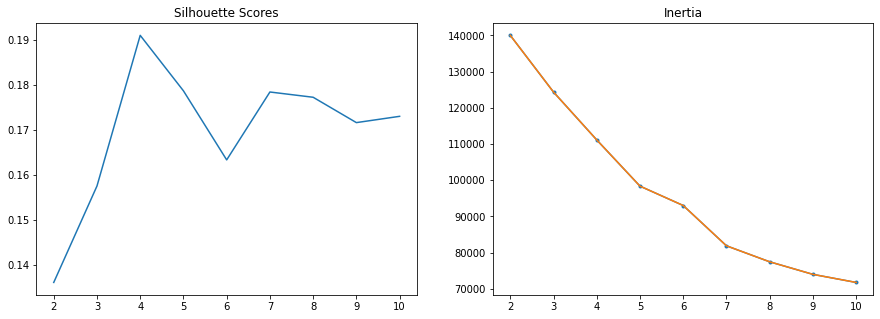

In [42]:
# Recorremos en un ciclo los valores k entre 2 y 10 y almacena las inercias en la lista.
ks = range(2,11)
sils = []
inertias = []

# Iteramos sobre el rango de K Clusters para buscar el numéro optimo de clusters
for k in ks:
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(X_scaled)
  sils.append(silhouette_score(X_scaled, kmeans.labels_))
  inertias.append(kmeans.inertia_)

# Dibujo las inercias y valores de silueta por cada numéro de clusters.
fig, axes = plt.subplots(1,2, figsize=(15,5))
plt.plot(range(2,11), inertias, marker = '.')
axes[0].plot(ks, sils)
axes[0].set_title('Silhouette Scores')
axes[0].set_xticks(ks)

axes[1].plot(ks, inertias)
axes[1].set_title('Inertia')
axes[1].set_xticks(ks);

Puedo observar que agrupar los datos en 4 grupos nos da la mejor puntuación de silueta y al igual que detecte un codo en el trazado de inercia en 4. Si bien el trazado de inercia tiene un codo no tan claro, pero que donde inicia su pronunciación es entre 5 y 6, la puntuación de silueta parece favorecer los grupos mejor en 4. Así que he decidido escogere 4 como el valor de clústeres.

Ajusto un nuevo modelo con 4 clústeres y agrego esos clústeres a una nueva columna en el dataframe original.

In [43]:
# Reajusto KMeans con 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_scaled)

# Add the clusters as a column in the dataframe
clients['cluster'] = kmeans.labels_
clients.head()

,Income,Age,Experience,Married,Owns_House,Owns_Car,Current_Job_Yrs,Current_House_Yrs,Risk_Flag,cluster
0,3635824,56,8,0,0,0,8,13,1,1
1,3231341,47,6,1,0,0,6,14,0,0
2,7430695,59,8,0,0,0,8,10,0,1
3,8688710,47,1,0,0,0,1,10,0,1
5,8643896,31,3,0,0,0,3,11,0,1


Procedere a analizar los clústeres para obtener algunas estadísticas resumidas sobre cada clúster. Agrupare los datos por clúster y agregare los grupos por los valores medios de cada característica.

In [44]:
# Agrupo el dataframe por cluster y agregar por valores medios
# Añado as_index=False para que los clusters sean una columna, no el índice
cluster_groups = clients.groupby('cluster', as_index=False).mean()
cluster_groups

,cluster,Income,Age,Experience,Married,Owns_House,Owns_Car,Current_Job_Yrs,Current_House_Yrs,Risk_Flag
0,0,5.089914e+06,51.688149,9.620426,1.000000,0.0,0.293829,6.117422,12.002185,0.102130
1,1,5.052702e+06,51.657708,9.588720,0.000000,0.0,0.000000,6.134665,11.975111,0.130217
2,2,5.030822e+06,51.993904,9.701938,0.000000,0.0,1.000000,6.280644,11.998040,0.116264
3,3,4.950885e+06,53.806925,10.131165,0.083945,1.0,0.320042,6.454355,12.152151,0.100735


### 5. Analyze and report on the clusters.

* Create 2 report quality explanatory visualizations showing important differences between the clusters.
* Interpret and explain each visualization.

Inicialmente, voy a crear un gráfico de las visualizaciones de agrupamiento que cree anteriormente basándome en las mejores puntuaciones de correlación entre columnas de características.

In [45]:
# Ajustamos 2 modelos KMeans diferentes, uno con 2 clusters y otro con 4 clusters que el fue de mejor valoración en puntuación de silueta
kmeans2 = KMeans(n_clusters = 2)
kmeans4 = KMeans(n_clusters = 4)
kmeans2.fit(X_scaled)
kmeans4.fit(X_scaled)

KMeans(n_clusters=4)

Gráfico los clústeres 2 y 4 para ver si puedo determinar el mejor clúster visualmente.

Text(0.5, 1.0, 'KMeans 4 Clusters')

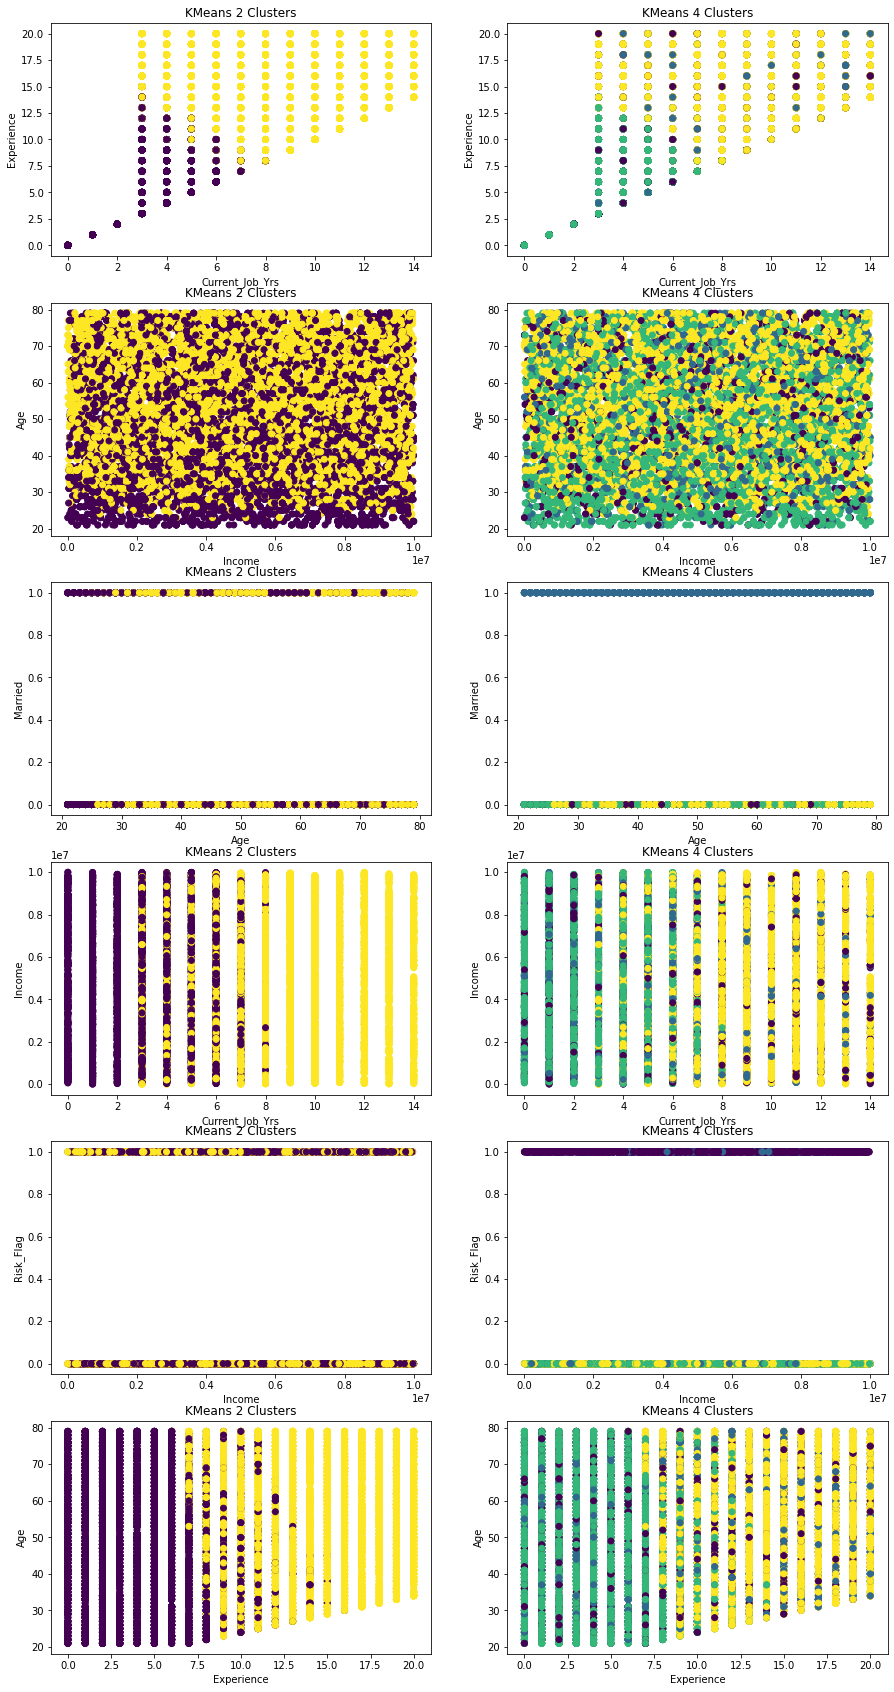

In [46]:
# Guardo las etiquetas de los clusters en el marco de datos
clients['cluster2'] = kmeans2.labels_
clients['cluster4'] = kmeans4.labels_

# Visualizo los clústeres
fig, axes = plt.subplots(6,2, figsize=(15,30))
axes[0,0].scatter(clients['Current_Job_Yrs'], clients['Experience'], c = clients['cluster2'])
axes[0,0].set_xlabel('Current_Job_Yrs')
axes[0,0].set_ylabel('Experience')
axes[0,0].set_title('KMeans 2 Clusters')
axes[0,1].scatter(clients['Current_Job_Yrs'], clients['Experience'], c = clients['cluster4'])
axes[0,1].set_xlabel('Current_Job_Yrs')
axes[0,1].set_ylabel('Experience')
axes[0,1].set_title('KMeans 4 Clusters')

axes[1,0].scatter(clients['Income'], clients['Age'], c = clients['cluster2'])
axes[1,0].set_xlabel('Income')
axes[1,0].set_ylabel('Age')
axes[1,0].set_title('KMeans 2 Clusters')
axes[1,1].scatter(clients['Income'], clients['Age'], c = clients['cluster4'])
axes[1,1].set_xlabel('Income')
axes[1,1].set_ylabel('Age')
axes[1,1].set_title('KMeans 4 Clusters')

axes[2,0].scatter(clients['Age'], clients['Married'], c = clients['cluster2'])
axes[2,0].set_xlabel('Age')
axes[2,0].set_ylabel('Married')
axes[2,0].set_title('KMeans 2 Clusters')
axes[2,1].scatter(clients['Age'], clients['Married'], c = clients['cluster4'])
axes[2,1].set_xlabel('Age')
axes[2,1].set_ylabel('Married')
axes[2,1].set_title('KMeans 4 Clusters')

axes[3,0].scatter(clients['Current_Job_Yrs'], clients['Income'], c = clients['cluster2'])
axes[3,0].set_xlabel('Current_Job_Yrs')
axes[3,0].set_ylabel('Income')
axes[3,0].set_title('KMeans 2 Clusters')
axes[3,1].scatter(clients['Current_Job_Yrs'], clients['Income'], c = clients['cluster4'])
axes[3,1].set_xlabel('Current_Job_Yrs')
axes[3,1].set_ylabel('Income')
axes[3,1].set_title('KMeans 4 Clusters')

axes[4,0].scatter(clients['Income'], clients['Risk_Flag'], c = clients['cluster2'])
axes[4,0].set_xlabel('Income')
axes[4,0].set_ylabel('Risk_Flag')
axes[4,0].set_title('KMeans 2 Clusters')
axes[4,1].scatter(clients['Income'], clients['Risk_Flag'], c = clients['cluster4'])
axes[4,1].set_xlabel('Income')
axes[4,1].set_ylabel('Risk_Flag')
axes[4,1].set_title('KMeans 4 Clusters')

axes[5,0].scatter(clients['Experience'], clients['Age'], c = clients['cluster2'])
axes[5,0].set_xlabel('Experience')
axes[5,0].set_ylabel('Age')
axes[5,0].set_title('KMeans 2 Clusters')
axes[5,1].scatter(clients['Experience'], clients['Age'], c = clients['cluster4'])
axes[5,1].set_xlabel('Experience')
axes[5,1].set_ylabel('Age')
axes[5,1].set_title('KMeans 4 Clusters')

**Conclusión 1:** Los anteriores gráficos están basados en las características que presentaron un mejor rendimiento en cuanto a correlación entre el set de datos y tambien analisis propio de dichas caracteristicas. La interpretación con 4 clústeres, que es lo sugerido desde la medición de silueta y codo, siento que me permite visualmente tener una mejor percepción en ciertos agrupamientos de estas características. El como se comporta su agrupamiento.

Con 2 clústeres se ve bien, pero siento que me pierdo del cómo sobresalen comportamientos más marcados de cuanto se utilizan 4 clústeres, por lo que para una mejor interpretación se necesitarían más de dos grupos como lo sugieren el análisis de números óptimos de clústeres.



---



Procedo a generar un segundo gráfico donde se agrupa la comparación de los valores medios de cada característica del set de datos.

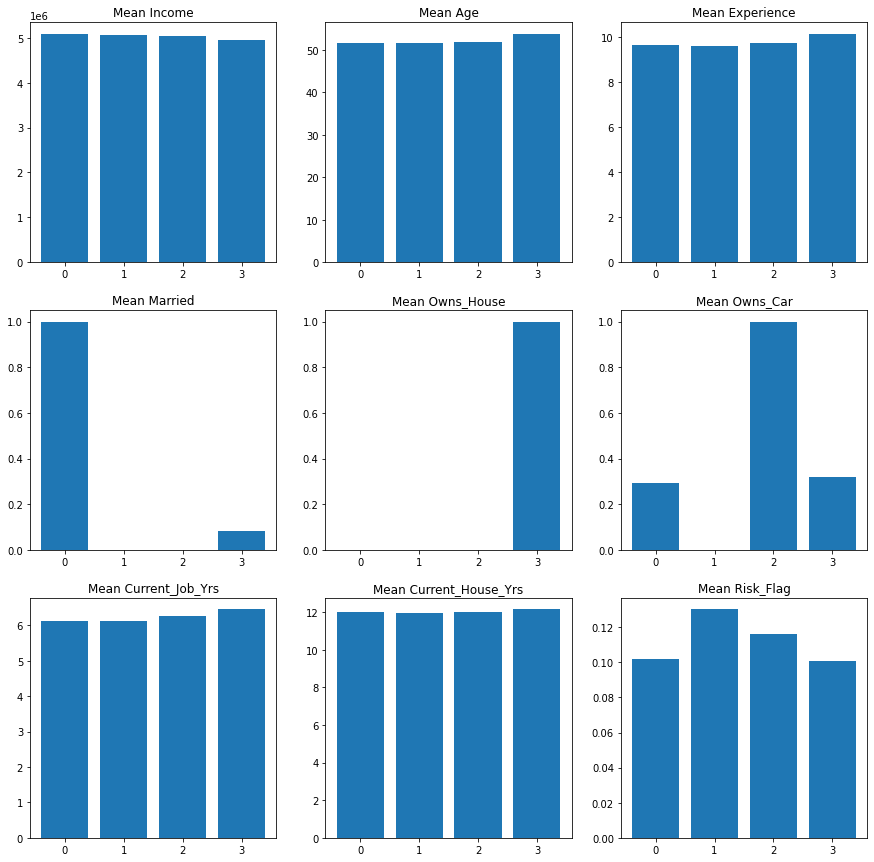

In [47]:
# Visualizar medios 
fig, axes = plt.subplots(3,3, figsize = (15, 15))

# fig representa un array de dimensiones 3,4. axes.ravel() lo aplanará a 12,1
axes = axes.ravel()

# Se crea un bucle sobre las columnas y trace cada una en una figura separada, que omita la columna 'cluster'.
for i, col in enumerate(cluster_groups.columns[1:]):
  axes[i].bar(cluster_groups['cluster'], cluster_groups[col])
  axes[i].set_title(f'Mean {col}')

**Conclusión 2:** 

* ***Cluster 0:*** El clúster 0 tiene por un poco el valor más alto de Ingreso sobre los demás valores promedio registrados en los otros clústeres. También se destaca que los clientes asociados a este clúster son los que tienen un valor predominante de estar casados. Son clientes con una edad promedio de 50 años, que tienen buena experiencia laboral y que particularmente están en su labor actual desde hace 6 años, al igual que en la misma casa unos 12 años. Algo a remarcar es que este clúster no muestra dueños de casa y un muy bajo nivel de propietarios de carro. El riesgo es el 2.º menos alto.

<br>

* ***Cluster 1:*** El clúster 1 sobresale entre los clientes con mayor promedio inclinado a cumplimiento de riesgo. Son clientes sin propiedad de casa y carro, sin casamiento. Con nivel de experiencia levemente más bajo que los demás clústeres, de unos 9 años aproximadamente. La edad promedio está orientada a unos 50 años aproximadamente y su promedio ingreso está bajo el mismo nivel de los clústeres 0 y 2.

<br>

* ***Cluster 2:*** 
Los clientes del clúster 2 son los que representan la mayoría de propietarios de carro, aunque no tiene propiedad de casas. Es el segundo clúster con más propensión en cuanto a riesgo. Son clientes con ingreso promedio como los del clúster 0 y 1, los años de trabajo en el mismo puesto son un poco más alto que los dos primeros clústeres. También destaca por tener un poco más de experiencia cercana a los 10 años, superando levemente los primeros dos clústeres.

<br>

* ***Cluster 3:*** 
El clúster 3 tiene a los clientes con mayor años de experiencia pero con el menor promedio de ingreso sobre los demás clústeres. Este clúster también destaca por ser el predominante en cuanto a propietarios de casa, tiene una leve inclinación a estar casados, también son los clientes con segundo mejor promedio de propiedad de carros, tienen los años de concurrencia en el mismo trabajo más alto y al igual que son los que tienen el promedio de edad más alto. Particularmente este clúster se resalta por ser el grupo con menor inclinación a riesgo. 

<br>

**En mi perspectiva analizando todas las variables siento que los clientes que estan relacionados especialmente a los clústeres 3 y 1 son los que mas se destacarian por su contraparte, dado que representan a los clientes que representan menor y mayor riesgo a ser candidatos a prestamos.**




---



## **Part 2: Modeling Instructions**

The bank would also like you to make a model to predict the risk of providing new loans to customers.  They have provided a dataset of past loan information labeled with the risk flags that were previously assigned to those customers.  The new dataset has a large number of features which will need to be reduced using dimensionality reduction.

*Risk_Flag is your target variable*

### 1. Load this dataset for modeling

In [48]:
# Importamos las bibliotecas requeridas para primera parte
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn import set_config
set_config(display='diagram')
from sklearn.decomposition import PCA

Obtenemos la carga del set de datos y analizamos inicialmente estos datos antes de proceder a la limpieza y el modelado

In [49]:
# Importamos el set de datos y lo visualizamos en un DataFrame
clients_lmodel = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Codificación de Dojo/Semana12/Belt Exam/loan_model_df.csv')
clients_lmodel.head()

,Income,Age,Experience,Married,Owns_House,Owns_Car,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,Profession_Air_traffic_controller,...,STATE_Punjab,STATE_Rajasthan,STATE_Sikkim,STATE_Tamil_Nadu,STATE_Telangana,STATE_Tripura,STATE_Uttar_Pradesh,STATE_Uttar_Pradesh[5],STATE_Uttarakhand,STATE_West_Bengal
0,3635824,56,8,0,0,0,8,13,1,0,...,0,0,0,0,0,0,0,0,0,0
1,3231341,47,6,1,0,0,6,14,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7430695,59,8,0,0,0,8,10,0,0,...,0,0,0,0,0,0,0,0,0,1
3,8688710,47,1,0,0,0,1,10,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2229190,21,11,0,0,0,9,11,0,0,...,0,0,0,0,0,0,0,0,0,0


### 2. This dataset is pre-cleaned, but may need to be processed before modeling.

In [50]:
# Verifico la nomenclatura de las columnas en caso de poseer algún espaciado y que no vaya a influir en errores de mis próximas validaciones
clients_lmodel.columns

Index(['Income', 'Age', 'Experience', 'Married', 'Owns_House', 'Owns_Car',
       'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Risk_Flag',
       'Profession_Air_traffic_controller',
       ...
       'STATE_Punjab', 'STATE_Rajasthan', 'STATE_Sikkim', 'STATE_Tamil_Nadu',
       'STATE_Telangana', 'STATE_Tripura', 'STATE_Uttar_Pradesh',
       'STATE_Uttar_Pradesh[5]', 'STATE_Uttarakhand', 'STATE_West_Bengal'],
      dtype='object', length=406)

In [51]:
# Inicialmente identifico la forma del set de datos
clients_lmodel.shape

(19438, 406)

Con lo anterior puedo entender que este set de datos se compone de 19.438 filas y 406 columnas. Posteriormente, voy a identificar los tipos de datos que componen cada columna al igual si se tienen valores faltantes.

In [52]:
# Reviso el número y tipo de dato por Columna, al igual que los datos faltantes que se tengan
print(clients_lmodel.info(), '\n')
print(clients_lmodel.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19438 entries, 0 to 19437
Columns: 406 entries, Income to STATE_West_Bengal
dtypes: int64(406)
memory usage: 60.2 MB
None 

Income                    int64
Age                       int64
Experience                int64
Married                   int64
Owns_House                int64
                          ...  
STATE_Tripura             int64
STATE_Uttar_Pradesh       int64
STATE_Uttar_Pradesh[5]    int64
STATE_Uttarakhand         int64
STATE_West_Bengal         int64
Length: 406, dtype: object


In [53]:
# Verificando si hay valore NaN
print(clients_lmodel.isna().sum().sum())

0


Podemos ver que en el set de datos cada columna tiene valores completos. No se tienen datos faltantes y que las columnas de datos son de tipo numérico, como int64 en gran medida.

In [54]:
# Identifico cual es la cantidad de datos duplicados y en caso de existir poderlos depurar
clients_lmodel.duplicated()
clients_lmodel.duplicated().sum()

10463

Se tienen 10.463 filas duplicadas. Me encuentro que este es un número muy elevado frente al total de datos que tengo mi set. Como lo analizamos en la primera parte del proyecto este gran volumen de datos duplicados se debe a que no se tiene un asociamiento de cada fila a una ID que identifique a cada cliente en especifico, sino que se repiten valores porque simplemente coinciden, refiriendonos a caracteristicas como la edad, los años de experiencia, valor de ingreso, el tener riesgo 1 o 0, por mencionar algunos.

Vemos que el set de datos tiene para validar si hay datos con inconsistencias que debamos abordar y corregir. Por lo que me enfocaré en las técnicas empleadas anteriormente en la parte de clústeres.

Recordemos que en referencia a las leyes laborales en el pais India, de donde son los clientes asociados a dicho banco. Me he encontrado que según la ley los niños que hayan alcanzado la edad de 14 años pueden trabajar. ([Ver Fuente](http://www.ilo.org/public/spanish/standards/relm/gb/docs/gb277/3-2/abol/i1.htm#:~:text=En%20la%20Constituci%C3%B3n%20de%20la,minas%20y%20otros%20empleos%20peligrosos.)).

<br>

Con base a la información anterior he definido entonces que las personas que tengan 26 años o menos de 26 años y que tenga 13 o mas años de experiencia en un mismo trabajo no cumplirian dicha condición.

In [55]:
# Creo un filtro para identificar cuantas personas tienen 26 o menos años y que tienen 13 o más años trabajando en un mismo puesto
People_CJY_filter = clients_lmodel[(clients_lmodel.CURRENT_JOB_YRS >= 13) & (clients_lmodel.Age <= 26)]
People_CJY_filter.sort_values('Age')

,Income,Age,Experience,Married,Owns_House,Owns_Car,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,Profession_Air_traffic_controller,...,STATE_Punjab,STATE_Rajasthan,STATE_Sikkim,STATE_Tamil_Nadu,STATE_Telangana,STATE_Tripura,STATE_Uttar_Pradesh,STATE_Uttar_Pradesh[5],STATE_Uttarakhand,STATE_West_Bengal
8909,710851,21,19,0,0,1,14,12,0,0,...,0,0,0,0,0,0,1,0,0,0
4701,7212880,21,17,0,0,0,13,12,1,0,...,0,0,0,0,0,0,0,0,0,0
17969,4591482,21,15,0,1,1,14,10,0,0,...,0,0,0,0,0,0,0,0,0,1
12929,6107468,21,16,0,0,0,13,14,1,0,...,0,0,0,0,0,0,0,0,0,0
11408,4591482,21,15,0,1,1,14,10,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15975,8400754,26,13,0,0,1,13,13,0,0,...,0,0,0,0,0,0,0,0,0,0
8896,894168,26,20,0,0,1,14,14,1,0,...,0,0,0,0,0,0,0,0,0,0
19315,8400754,26,13,0,0,1,13,13,0,0,...,0,0,0,0,0,0,0,0,0,0
2294,8400754,26,13,0,0,1,13,13,0,0,...,0,0,0,0,0,0,0,0,0,0


Por lo que he decidido mejor borrar esta información al ver que son pocas filas y que no representan un cambio muy fuerte dentro del set de datos.

In [56]:
# Procedemos a borrar los indices de las filas asociadas al set de datos que cumplen las condiciones del filtro
clients_lmodel.drop(clients_lmodel[(clients_lmodel.CURRENT_JOB_YRS >= 13) & (clients_lmodel.Age <= 26)].index, inplace=True)

# Volvemos a aplicar el filtro para validar si aún siguen apareciendo las filas que cumplian con el anterior condicional
People_CJY_filter = clients_lmodel[(clients_lmodel.CURRENT_JOB_YRS >= 13) & (clients_lmodel.Age <= 26)]
People_CJY_filter.count()

Income                    0
Age                       0
Experience                0
Married                   0
Owns_House                0
                         ..
STATE_Tripura             0
STATE_Uttar_Pradesh       0
STATE_Uttar_Pradesh[5]    0
STATE_Uttarakhand         0
STATE_West_Bengal         0
Length: 406, dtype: int64

Basándome en el anterior concepto encontrado en el estatuto de ley para el País. Me he basado en que una persona que inicia su vida laboral, desde los 14 años hasta sus 21, ha obtenido 7 años de experiencia. Por lo que revisaré inicialmente la cantidad de personas con más de 8 años experiencia que podrían ser propensos a romper esta lógica.

In [57]:
# Procedo a crear un filtro que cumpla el condicional de que una persona no puede tener tanto X años y más de X años de experiencia laboral
Experience_Age_filter1 = clients_lmodel[(clients_lmodel.Experience >= 8) & (clients_lmodel.Age == 21)]
Experience_Age_filter2 = clients_lmodel[(clients_lmodel.Experience >= 9) & (clients_lmodel.Age == 22)]
Experience_Age_filter3 = clients_lmodel[(clients_lmodel.Experience >= 10) & (clients_lmodel.Age == 23)]
Experience_Age_filter4 = clients_lmodel[(clients_lmodel.Experience >= 11) & (clients_lmodel.Age == 24)]
Experience_Age_filter5 = clients_lmodel[(clients_lmodel.Experience >= 12) & (clients_lmodel.Age == 25)]
Experience_Age_filter6 = clients_lmodel[(clients_lmodel.Experience >= 13) & (clients_lmodel.Age == 26)]
Experience_Age_filter7 = clients_lmodel[(clients_lmodel.Experience >= 14) & (clients_lmodel.Age == 27)]
Experience_Age_filter8 = clients_lmodel[(clients_lmodel.Experience >= 15) & (clients_lmodel.Age == 28)]
Experience_Age_filter9 = clients_lmodel[(clients_lmodel.Experience >= 16) & (clients_lmodel.Age == 29)]
Experience_Age_filter10 = clients_lmodel[(clients_lmodel.Experience >= 17) & (clients_lmodel.Age == 30)]
Experience_Age_filter11 = clients_lmodel[(clients_lmodel.Experience >= 18) & (clients_lmodel.Age == 31)]
Experience_Age_filter12 = clients_lmodel[(clients_lmodel.Experience >= 19) & (clients_lmodel.Age == 32)]
Experience_Age_filter13 = clients_lmodel[(clients_lmodel.Experience >= 20) & (clients_lmodel.Age == 33)]
people_EA_f1 = Experience_Age_filter1.value_counts().sum()
people_EA_f2 = Experience_Age_filter2.value_counts().sum()
people_EA_f3 = Experience_Age_filter3.value_counts().sum()
people_EA_f4 = Experience_Age_filter4.value_counts().sum()
people_EA_f5 = Experience_Age_filter5.value_counts().sum()
people_EA_f6 = Experience_Age_filter6.value_counts().sum()
people_EA_f7 = Experience_Age_filter7.value_counts().sum()
people_EA_f8 = Experience_Age_filter8.value_counts().sum()
people_EA_f9 = Experience_Age_filter9.value_counts().sum()
people_EA_f10 = Experience_Age_filter10.value_counts().sum()
people_EA_f11 = Experience_Age_filter11.value_counts().sum()
people_EA_f12 = Experience_Age_filter12.value_counts().sum()
people_EA_f13 = Experience_Age_filter13.value_counts().sum()

Por lo que he decidido mejor borrar esta información al ver que son pocas filas y que no representan un cambio muy fuerte dentro del set de datos.

In [58]:
# Procedemos a borrar los indices de las filas asociadas al set de datos que cumplen las condiciones del filtro
clients_lmodel.drop(clients_lmodel[(clients_lmodel.Experience >= 8) & (clients_lmodel.Age == 21)].index, inplace=True)
clients_lmodel.drop(clients_lmodel[(clients_lmodel.Experience >= 9) & (clients_lmodel.Age == 22)].index, inplace=True)
clients_lmodel.drop(clients_lmodel[(clients_lmodel.Experience >= 10) & (clients_lmodel.Age == 23)].index, inplace=True)
clients_lmodel.drop(clients_lmodel[(clients_lmodel.Experience >= 11) & (clients_lmodel.Age == 24)].index, inplace=True)
clients_lmodel.drop(clients_lmodel[(clients_lmodel.Experience >= 12) & (clients_lmodel.Age == 25)].index, inplace=True)
clients_lmodel.drop(clients_lmodel[(clients_lmodel.Experience >= 13) & (clients_lmodel.Age == 26)].index, inplace=True)
clients_lmodel.drop(clients_lmodel[(clients_lmodel.Experience >= 14) & (clients_lmodel.Age == 27)].index, inplace=True)
clients_lmodel.drop(clients_lmodel[(clients_lmodel.Experience >= 15) & (clients_lmodel.Age == 28)].index, inplace=True)
clients_lmodel.drop(clients_lmodel[(clients_lmodel.Experience >= 16) & (clients_lmodel.Age == 29)].index, inplace=True)
clients_lmodel.drop(clients_lmodel[(clients_lmodel.Experience >= 17) & (clients_lmodel.Age == 30)].index, inplace=True)
clients_lmodel.drop(clients_lmodel[(clients_lmodel.Experience >= 18) & (clients_lmodel.Age == 31)].index, inplace=True)
clients_lmodel.drop(clients_lmodel[(clients_lmodel.Experience >= 19) & (clients_lmodel.Age == 32)].index, inplace=True)
clients_lmodel.drop(clients_lmodel[(clients_lmodel.Experience >= 19) & (clients_lmodel.Age == 32)].index, inplace=True)
clients_lmodel.drop(clients_lmodel[(clients_lmodel.Experience >= 20) & (clients_lmodel.Age == 33)].index, inplace=True)

In [59]:
# Volvemos a aplicar el filtro para validar si aún siguen apareciendo las filas que cumplian con los anteriores condicionales
Experience_Age_filter1 = clients_lmodel[(clients_lmodel.Experience >= 8) & (clients_lmodel.Age == 21)]
Experience_Age_filter2 = clients_lmodel[(clients_lmodel.Experience >= 9) & (clients_lmodel.Age == 22)]
Experience_Age_filter3 = clients_lmodel[(clients_lmodel.Experience >= 10) & (clients_lmodel.Age == 23)]
Experience_Age_filter4 = clients_lmodel[(clients_lmodel.Experience >= 11) & (clients_lmodel.Age == 24)]
Experience_Age_filter5 = clients_lmodel[(clients_lmodel.Experience >= 12) & (clients_lmodel.Age == 25)]
Experience_Age_filter6 = clients_lmodel[(clients_lmodel.Experience >= 13) & (clients_lmodel.Age == 26)]
Experience_Age_filter7 = clients_lmodel[(clients_lmodel.Experience >= 14) & (clients_lmodel.Age == 27)]
Experience_Age_filter8 = clients_lmodel[(clients_lmodel.Experience >= 15) & (clients_lmodel.Age == 28)]
Experience_Age_filter9 = clients_lmodel[(clients_lmodel.Experience >= 16) & (clients_lmodel.Age == 29)]
Experience_Age_filter10 = clients_lmodel[(clients_lmodel.Experience >= 17) & (clients_lmodel.Age == 30)]
Experience_Age_filter11 = clients_lmodel[(clients_lmodel.Experience >= 18) & (clients_lmodel.Age == 31)]
Experience_Age_filter12 = clients_lmodel[(clients_lmodel.Experience >= 19) & (clients_lmodel.Age == 32)]
Experience_Age_filter13 = clients_lmodel[(clients_lmodel.Experience >= 20) & (clients_lmodel.Age == 33)]
people_EA_f1 = Experience_Age_filter1.value_counts().sum()
people_EA_f2 = Experience_Age_filter2.value_counts().sum()
people_EA_f3 = Experience_Age_filter3.value_counts().sum()
people_EA_f4 = Experience_Age_filter4.value_counts().sum()
people_EA_f5 = Experience_Age_filter5.value_counts().sum()
people_EA_f6 = Experience_Age_filter6.value_counts().sum()
people_EA_f7 = Experience_Age_filter7.value_counts().sum()
people_EA_f8 = Experience_Age_filter8.value_counts().sum()
people_EA_f9 = Experience_Age_filter9.value_counts().sum()
people_EA_f10 = Experience_Age_filter10.value_counts().sum()
people_EA_f11 = Experience_Age_filter11.value_counts().sum()
people_EA_f12 = Experience_Age_filter12.value_counts().sum()
people_EA_f13 = Experience_Age_filter13.value_counts().sum()
print(f'El numero de personas que cumple el condicional del filtro 1 son: ', people_EA_f1)
print(f'El numero de personas que cumple el condicional del filtro 2 son: ', people_EA_f2)
print(f'El numero de personas que cumple el condicional del filtro 3 son: ', people_EA_f3)
print(f'El numero de personas que cumple el condicional del filtro 4 son: ', people_EA_f4)
print(f'El numero de personas que cumple el condicional del filtro 5 son: ', people_EA_f5)
print(f'El numero de personas que cumple el condicional del filtro 6 son: ', people_EA_f6)
print(f'El numero de personas que cumple el condicional del filtro 7 son: ', people_EA_f7)
print(f'El numero de personas que cumple el condicional del filtro 8 son: ', people_EA_f8)
print(f'El numero de personas que cumple el condicional del filtro 9 son: ', people_EA_f9)
print(f'El numero de personas que cumple el condicional del filtro 10 son: ', people_EA_f10)
print(f'El numero de personas que cumple el condicional del filtro 11 son: ', people_EA_f11)
print(f'El numero de personas que cumple el condicional del filtro 12 son: ', people_EA_f12)
print(f'El numero de personas que cumple el condicional del filtro 13 son: ', people_EA_f13)
print('')

El numero de personas que cumple el condicional del filtro 1 son:  0
El numero de personas que cumple el condicional del filtro 2 son:  0
El numero de personas que cumple el condicional del filtro 3 son:  0
El numero de personas que cumple el condicional del filtro 4 son:  0
El numero de personas que cumple el condicional del filtro 5 son:  0
El numero de personas que cumple el condicional del filtro 6 son:  0
El numero de personas que cumple el condicional del filtro 7 son:  0
El numero de personas que cumple el condicional del filtro 8 son:  0
El numero de personas que cumple el condicional del filtro 9 son:  0
El numero de personas que cumple el condicional del filtro 10 son:  0
El numero de personas que cumple el condicional del filtro 11 son:  0
El numero de personas que cumple el condicional del filtro 12 son:  0
El numero de personas que cumple el condicional del filtro 13 son:  0



In [60]:
# Verifico nuevamente el estado de mi set de datos
clients.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17944 entries, 0 to 19437
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Income             17944 non-null  int64
 1   Age                17944 non-null  int64
 2   Experience         17944 non-null  int64
 3   Married            17944 non-null  int64
 4   Owns_House         17944 non-null  int64
 5   Owns_Car           17944 non-null  int64
 6   Current_Job_Yrs    17944 non-null  int64
 7   Current_House_Yrs  17944 non-null  int64
 8   Risk_Flag          17944 non-null  int64
 9   cluster            17944 non-null  int32
 10  cluster2           17944 non-null  int32
 11  cluster4           17944 non-null  int32
dtypes: int32(3), int64(9)
memory usage: 1.6 MB


Como veo que hay diferentes tipos de valores únicos por columna y entendiendo que toda la composición del set de datos es de categoría numérica, me gustaría visualizar la descripción estadística que está relacionada con los datos del data set.

In [61]:
# Observo con la función describe todas las estadísticas de las columnas, para obtener valores mínimos, máximos, media, conteo, entre otros que componen el data set
clients_lmodel.describe()

,Income,Age,Experience,Married,Owns_House,Owns_Car,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,Profession_Air_traffic_controller,...,STATE_Punjab,STATE_Rajasthan,STATE_Sikkim,STATE_Tamil_Nadu,STATE_Telangana,STATE_Tripura,STATE_Uttar_Pradesh,STATE_Uttar_Pradesh[5],STATE_Uttarakhand,STATE_West_Bengal
count,1.794400e+04,17944.000000,17944.000000,17944.000000,17944.000000,17944.000000,17944.000000,17944.000000,17944.000000,17944.000000,...,17944.000000,17944.000000,17944.000000,17944.000000,17944.000000,17944.000000,17944.000000,17944.000000,17944.000000,17944.000000
mean,5.045491e+06,51.861012,9.649744,0.106498,0.053110,0.302942,6.187249,11.993145,0.122214,0.019004,...,0.020007,0.037561,0.002229,0.062361,0.031654,0.004458,0.111458,0.002564,0.005852,0.094126
std,2.891339e+06,16.012224,5.904362,0.308483,0.224258,0.459543,3.608038,1.407501,0.327541,0.136541,...,0.140027,0.190138,0.047163,0.241816,0.175082,0.066623,0.314707,0.050568,0.076273,0.292012
min,1.031000e+04,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.513457e+06,39.000000,5.000000,0.000000,0.000000,0.000000,3.000000,11.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.055124e+06,52.000000,9.000000,0.000000,0.000000,0.000000,6.000000,12.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.537350e+06,66.000000,15.000000,0.000000,0.000000,1.000000,9.000000,13.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.999180e+06,79.000000,20.000000,1.000000,1.000000,1.000000,14.000000,14.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 3. Use random_state = 42 for your train_test_split

Divido los datos en característica (X) y objetivo (y). Realizo un train test split a los datos

In [62]:
# Usando el formato para ML procedo a definir el objetivo y, junto a las características X
y = clients_lmodel['Risk_Flag']
X = clients_lmodel.drop(columns=['Risk_Flag'])

# Creo un train test split a los datos para el conjunto de datos y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

# Verifico la forma del conjunto de caracteristicas
X.shape

(17944, 405)

Puedo ver que este se compone de 17.944 características y 405 columnas.

### 4. Apply PCA to reduce the number of features.

* Compare how many columns are present before and after PCA

Escalo los datos antes de aplicarles PCA y posterior ajusto los transformadores

In [63]:
# Instancio el Escalador Estándar
scaler = StandardScaler()

# Ajusto el escalador y procedo a transformar los datos sin PCA
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [64]:
# Verifico la forma del conjunto de caracteristicas
shape_train_without_pca = X_train.shape
shape_test_without_pca = X_test.shape
print(f'La forma del conjunto de Train sin PCA es:', shape_train_without_pca)
print(f'La forma del conjunto de Test sin PCA es:', shape_test_without_pca)

La forma del conjunto de Train sin PCA es: (13458, 405)
La forma del conjunto de Test sin PCA es: (4486, 405)


Asigno PCA al conjunto de datos escalados, le definimos el % de varianza y ajustamos los transformadores

In [65]:
# Instancio PCA reteniendo 95% de la varianza y transformamos los datos con PCA
pca = PCA(n_components=.85)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [66]:
# Verifico la forma del conjunto de caracteristicas
shape_train_with_pca = X_train_pca.shape
shape_test_with_pca = X_test_pca.shape
print(f'La forma del conjunto de Train con PCA es:', shape_train_with_pca)
print(f'La forma del conjunto de Test con PCA es:', shape_test_with_pca)

La forma del conjunto de Train con PCA es: (13458, 300)
La forma del conjunto de Test con PCA es: (4486, 300)


Como puedo identificar las columnas luego de aplicar PCA pasaron de ser 405 a 300.

### 5-6. Do not leak data. Use a deep learning model to predict the selling price of the houses.

* Create 3 different versions of a sequential model.
  * Each new model should be an iteration on the previous model.
  * Justify in writing why you changed what you did for each new model. (For example, why did you add layers, regularization, nodes, etc)
* Use some form of regularization with at least one model.
* Evaluate each model with appropriate metrics.

In [67]:
# Importo librerias requeridas
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

### 🎯 **1er Modelo**

Defino cuantas características tengo en los datos X. Para este modelo utilizaré los datos escalados pero con aplicación de PCA.

In [68]:
# Defino la estructura de la red
# Guardo el número de características que tenemos como forma de entrada.
input_shape = X_train_pca.shape[1]
input_shape

300

Defino el tipo de modelo a utilizar, en este caso modelo Secuencial

In [69]:
# Instancio modelo secuencial
model = Sequential()

Defino el número de capas que para este primer modelo será de 2, al igual que defino el número de neuronas para la primera capa de 300 que es nuestro máximo permitido y para la segunda de 150 y el tipo activación estará basado en Relu.

In [70]:
# Primera capa oculta
model.add(Dense(300, # Numero de neuronas en la primera capa oculta
                input_dim = input_shape, # Forma de las características de entrada (número de columnas)
                activation = 'relu')) # Tipo de función de activación utilizada
# Segunda capa oculta
model.add(Dense(150, # Numero de neuronas en la segunda capa oculta
                activation = 'relu')) # Tipo de función de activación utilizada

Paara la salida utilizare la función de activación de tipo Sigmode, por ser un modelo de clasificación ya que el target es binario (1, 0).

In [71]:
# Capa de salida
model.add(Dense(1, activation = 'sigmoid'))

Procedo a compilar el modelo y ajustar el modelo a los datos de entrenamiento. Manteniendo en el ajuste un numero de 40 epocas, recordando que 10 es lo normalmente predefinido.

In [72]:
# Genero la compilación del modelo
model.compile(optimizer = 'adam', loss = 'bce', metrics=['accuracy'])

# Ajustar el modelo a los datos
history = model.fit(X_train_pca, y_train, validation_data = (X_test_pca, y_test), epochs=40)

Epoch 1/40
421/421 [==============================] - 3s 5ms/step - loss: 0.3902 - accuracy: 0.8717 - val_loss: 0.3610 - val_accuracy: 0.8825
Epoch 2/40
421/421 [==============================] - 2s 5ms/step - loss: 0.3548 - accuracy: 0.8762 - val_loss: 0.3578 - val_accuracy: 0.8823
Epoch 3/40
421/421 [==============================] - 2s 5ms/step - loss: 0.3381 - accuracy: 0.8770 - val_loss: 0.3555 - val_accuracy: 0.8819
Epoch 4/40
421/421 [==============================] - 2s 5ms/step - loss: 0.3197 - accuracy: 0.8814 - val_loss: 0.3491 - val_accuracy: 0.8848
Epoch 5/40
421/421 [==============================] - 2s 5ms/step - loss: 0.2966 - accuracy: 0.8845 - val_loss: 0.3388 - val_accuracy: 0.8852
Epoch 6/40
421/421 [==============================] - 2s 5ms/step - loss: 0.2725 - accuracy: 0.8909 - val_loss: 0.3512 - val_accuracy: 0.8723
Epoch 7/40
421/421 [==============================] - 2s 5ms/step - loss: 0.2521 - accuracy: 0.8935 - val_loss: 0.3509 - val_accuracy: 0.8803
Epoch 

Creo gráfico de visualización del modelo 1 para ver el comportamiento de la perdida

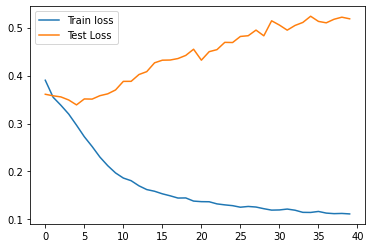

In [73]:
# Genero gráfico para visualizar la pérdida
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend();

Veo que el modelo está muy sobreajustado. Observamos cómo la pérdida de entrenamiento continúa disminuyendo a medida que la pérdida en la prueba comienza a aumentar cuando aumentamos el número de épocas para las que entreno el modelo.

**Por ello procedere a utilizar dropout y early stopping en este modelo.**

In [74]:
# Usando Dropout y Early Stopping
# Instancio modelo secuencial
model = Sequential()

# Primera capa oculta
model.add(Dense(300, # Numero de neuronas en la primera capa oculta
                input_dim = input_shape, # Forma de las características de entrada (número de columnas)
                activation = 'relu')) # Tipo de función de activación utilizada
# Aplicando Dropout a capa oculta
model.add(Dropout(0.2))

# Segunda capa oculta
model.add(Dense(150, # Numero de neuronas en la segunda capa oculta
                activation = 'relu')) # Tipo de función de activación utilizada
# Aplicando Dropout a capa oculta
model.add(Dropout(0.2))

# Capa de salida
model.add(Dense(1, activation = 'sigmoid'))

# Genero la compilación del modelo
model.compile(optimizer = 'adam', loss = 'bce', metrics=['accuracy'])

# Aplicando Early Stopping
early_stopping = EarlyStopping(patience = 5)

# Ajustar el modelo a los datos
history = model.fit(X_train_pca, y_train, validation_data = (X_test_pca, y_test), epochs=40, callbacks = [early_stopping])

Epoch 1/40
421/421 [==============================] - 3s 6ms/step - loss: 0.3982 - accuracy: 0.8730 - val_loss: 0.3699 - val_accuracy: 0.8827
Epoch 2/40
421/421 [==============================] - 2s 5ms/step - loss: 0.3638 - accuracy: 0.8759 - val_loss: 0.3667 - val_accuracy: 0.8812
Epoch 3/40
421/421 [==============================] - 3s 6ms/step - loss: 0.3546 - accuracy: 0.8764 - val_loss: 0.3585 - val_accuracy: 0.8819
Epoch 4/40
421/421 [==============================] - 3s 8ms/step - loss: 0.3435 - accuracy: 0.8762 - val_loss: 0.3551 - val_accuracy: 0.8823
Epoch 5/40
421/421 [==============================] - 3s 8ms/step - loss: 0.3301 - accuracy: 0.8791 - val_loss: 0.3563 - val_accuracy: 0.8814
Epoch 6/40
421/421 [==============================] - 3s 7ms/step - loss: 0.3221 - accuracy: 0.8793 - val_loss: 0.3461 - val_accuracy: 0.8823
Epoch 7/40
421/421 [==============================] - 3s 8ms/step - loss: 0.3074 - accuracy: 0.8819 - val_loss: 0.3427 - val_accuracy: 0.8821
Epoch 

**Creo gráfico de visualización del modelo 1 para ver el comportamiento de la perdida luego de aplicarle dropout y early stopping**

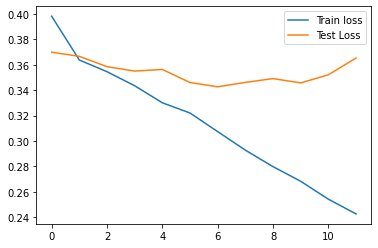

In [75]:
# Genero gráfico para visualizar la pérdida
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend();

En el gráfico puedo ver luego de aplicar los métodos para evitar el sobre ajuste, si redujo, pero no tan considerablemente como lo esperaba. Dado que la exactitud en los datos de prueba mantuvo una constante a diferencia de los datos de entrenamiento. Por lo que puede haber encontrado demasiada complejidad.



---



### 🎯 **2do Modelo**

Defino cuantas características tengo en los datos X. Para este modelo utilizaré los datos escalados pero con aplicación de PCA.

In [76]:
# Defino la estructura de la red
# Guardo el número de características que tenemos como forma de entrada.
input_shape = X_train_pca.shape[1]
input_shape

300

A este modelo decidi agregarle una capa mas a comparación del 1er modelo, utilizare 300, 200 y 100 neuronas respectivamente para cada capa y el tipo de activación seguira estando basado en Relu.

In [77]:
# Primera capa oculta
model.add(Dense(300, # Numero de neuronas en la primera capa oculta
                input_dim = input_shape, # Forma de las características de entrada (número de columnas)
                activation = 'relu')) # Tipo de función de activación utilizada
# Segunda capa oculta
model.add(Dense(200, # Numero de neuronas en la segunda capa oculta
                activation = 'relu')) # Tipo de función de activación utilizada
# Tercera capa oculta
model.add(Dense(100, # Numero de neuronas en la segunda capa oculta
                activation = 'relu')) # Tipo de función de activación utilizada

# Capa de salida
model.add(Dense(1, activation = 'sigmoid'))

# Genero la compilación del modelo
model.compile(loss = 'bce', optimizer = 'adam', metrics=['accuracy'])

# Ajustar el modelo a los datos
history = model.fit(X_train_pca, y_train, validation_data = (X_test_pca, y_test), epochs=40)

Epoch 1/40
421/421 [==============================] - 6s 12ms/step - loss: 0.2811 - accuracy: 0.8919 - val_loss: 0.3385 - val_accuracy: 0.8770
Epoch 2/40
421/421 [==============================] - 5s 12ms/step - loss: 0.2368 - accuracy: 0.8996 - val_loss: 0.3697 - val_accuracy: 0.8894
Epoch 3/40
421/421 [==============================] - 5s 11ms/step - loss: 0.2264 - accuracy: 0.9028 - val_loss: 0.3425 - val_accuracy: 0.8825
Epoch 4/40
421/421 [==============================] - 5s 12ms/step - loss: 0.2184 - accuracy: 0.9066 - val_loss: 0.3537 - val_accuracy: 0.8785
Epoch 5/40
421/421 [==============================] - 5s 11ms/step - loss: 0.2092 - accuracy: 0.9084 - val_loss: 0.3625 - val_accuracy: 0.8763
Epoch 6/40
421/421 [==============================] - 3s 8ms/step - loss: 0.2043 - accuracy: 0.9066 - val_loss: 0.3925 - val_accuracy: 0.8694
Epoch 7/40
421/421 [==============================] - 4s 10ms/step - loss: 0.1981 - accuracy: 0.9096 - val_loss: 0.3900 - val_accuracy: 0.8685


Creo gráfico de visualización del modelo 2 para ver el comportamiento de la perdida

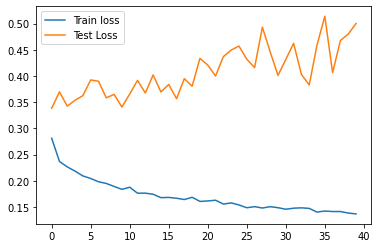

In [78]:
# Genero gráfico para visualizar la pérdida
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend();

En el gráfico puedo ver que el modelo si llega a completar las propagaciones, cumpliendo con el recorrido por todas las epocas definidas. Sin embargo el modelo sigue presentando sobreajuste, solo por curiosidad aplicare dropout y early stopping. A ver si su comportamiento cambia.


Lo anterior me sigue demostrando que pudo haber encontrado demasiada complejidad. Por haber aumentando las capas y neuronas. 

**Por ello procedere a utilizar dropout y early stopping en este modelo.**

In [79]:
# Usando Dropout y Early Stopping
# Instancio modelo secuencial
model = Sequential()

# Primera capa oculta
model.add(Dense(300, # Numero de neuronas en la primera capa oculta
                input_dim = input_shape, # Forma de las características de entrada (número de columnas)
                activation = 'relu')) # Tipo de función de activación utilizada
# Aplicando Dropout a capa oculta
model.add(Dropout(0.2))

# Segunda capa oculta
model.add(Dense(200, # Numero de neuronas en la segunda capa oculta
                activation = 'relu')) # Tipo de función de activación utilizada
# Aplicando Dropout a capa oculta
model.add(Dropout(0.2))

# Tercera capa oculta
model.add(Dense(100, # Numero de neuronas en la segunda capa oculta
                activation = 'relu')) # Tipo de función de activación utilizada
# Aplicando Dropout a capa oculta
model.add(Dropout(0.2))

# Capa de salida
model.add(Dense(1, activation = 'sigmoid'))

# Genero la compilación del modelo
model.compile(loss = 'bce', optimizer = 'adam', metrics=['accuracy'])

# Aplicando Early Stopping
early_stopping = EarlyStopping(patience = 5)
# Ajustar el modelo a los datos
history = model.fit(X_train_pca, y_train, validation_data = (X_test_pca, y_test), epochs=40, callbacks = [early_stopping])

Epoch 1/40
421/421 [==============================] - 4s 9ms/step - loss: 0.3878 - accuracy: 0.8747 - val_loss: 0.3729 - val_accuracy: 0.8827
Epoch 2/40
421/421 [==============================] - 4s 10ms/step - loss: 0.3699 - accuracy: 0.8761 - val_loss: 0.3676 - val_accuracy: 0.8827
Epoch 3/40
421/421 [==============================] - 4s 10ms/step - loss: 0.3596 - accuracy: 0.8760 - val_loss: 0.3678 - val_accuracy: 0.8827
Epoch 4/40
421/421 [==============================] - 3s 8ms/step - loss: 0.3537 - accuracy: 0.8764 - val_loss: 0.3662 - val_accuracy: 0.8823
Epoch 5/40
421/421 [==============================] - 4s 9ms/step - loss: 0.3459 - accuracy: 0.8766 - val_loss: 0.3579 - val_accuracy: 0.8825
Epoch 6/40
421/421 [==============================] - 4s 9ms/step - loss: 0.3356 - accuracy: 0.8774 - val_loss: 0.3660 - val_accuracy: 0.8836
Epoch 7/40
421/421 [==============================] - 3s 7ms/step - loss: 0.3237 - accuracy: 0.8795 - val_loss: 0.3537 - val_accuracy: 0.8843
Epoc

**Creo gráfico de visualización del modelo 2 para ver el comportamiento de la perdida luego de aplicarle dropout y early stopping**

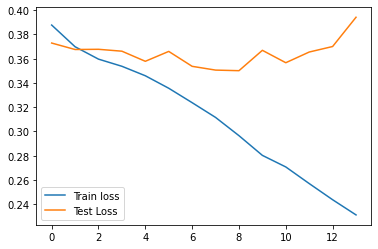

In [80]:
# Genero gráfico para visualizar la pérdida
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend();

No presento gran mejoria. Por lo que en definitiva el proximo modelo lo crearemos menos complejo para analizar si mejora su comportamiento.



---



### 🎯 **3er Modelo**

Defino cuantas características tengo en los datos X. Para este modelo utilizaré los datos escalados pero con aplicación de PCA.

In [81]:
# Defino la estructura de la red
# Guardo el número de características que tenemos como forma de entrada.
input_shape = X_train_pca.shape[1]
input_shape

300

En este modelo decidí volver a usar tres capas como en el segundo modelo, solo que utilizaré un número de neuronas muchísimo más inferior y el tipo de activación seguirá estando basado en Relu. Al igual que reducire el número de epocas.

In [82]:
# Primera capa oculta
model.add(Dense(10, # Numero de neuronas en la primera capa oculta
                input_dim = input_shape, # Forma de las características de entrada (número de columnas)
                activation = 'relu')) # Tipo de función de activación utilizada
# Segunda capa oculta
model.add(Dense(5, # Numero de neuronas en la segunda capa oculta
                activation = 'relu')) # Tipo de función de activación utilizada
# Tercera capa oculta
model.add(Dense(5, # Numero de neuronas en la segunda capa oculta
                activation = 'relu')) # Tipo de función de activación utilizada
  

# Capa de salida
model.add(Dense(1, activation = 'sigmoid'))

# Genero la compilación del modelo
model.compile(loss = 'bce', optimizer = 'adam', metrics=['accuracy'])

# Ajustar el modelo a los datos
history = model.fit(X_train_pca, y_train, validation_data = (X_test_pca, y_test), epochs=25)

Epoch 1/25
421/421 [==============================] - 4s 7ms/step - loss: 0.4660 - accuracy: 0.8834 - val_loss: 0.3402 - val_accuracy: 0.8827
Epoch 2/25
421/421 [==============================] - 3s 6ms/step - loss: 0.2898 - accuracy: 0.8784 - val_loss: 0.3331 - val_accuracy: 0.8756
Epoch 3/25
421/421 [==============================] - 3s 7ms/step - loss: 0.2542 - accuracy: 0.8948 - val_loss: 0.3323 - val_accuracy: 0.8781
Epoch 4/25
421/421 [==============================] - 3s 6ms/step - loss: 0.2299 - accuracy: 0.9041 - val_loss: 0.3561 - val_accuracy: 0.8651
Epoch 5/25
421/421 [==============================] - 3s 7ms/step - loss: 0.2224 - accuracy: 0.9034 - val_loss: 0.3370 - val_accuracy: 0.8825
Epoch 6/25
421/421 [==============================] - 3s 7ms/step - loss: 0.2070 - accuracy: 0.9120 - val_loss: 0.3753 - val_accuracy: 0.8634
Epoch 7/25
421/421 [==============================] - 3s 6ms/step - loss: 0.2015 - accuracy: 0.9125 - val_loss: 0.3552 - val_accuracy: 0.8774
Epoch 

Creo gráfico de visualización del modelo 3 para ver el comportamiento de la perdida

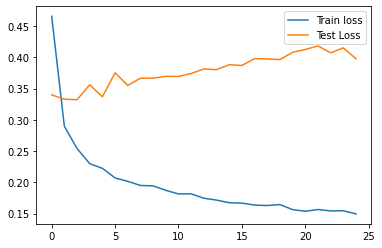

In [83]:
# Genero gráfico para visualizar la pérdida
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend();

En esta oportunidad podemos ver que ya esta mucho menos sobreajustado el modelo y que tanto las perdidas en los conjuntos de entrenamiento como de prueba se reduce de una manera mas sana.

Solo por curiosidad aplicare dropout y early stopping en este modelo.

In [84]:
# Usando Dropout y Early Stopping
# Instancio modelo secuencial
model = Sequential()

# Primera capa oculta
model.add(Dense(10, # Numero de neuronas en la primera capa oculta
                input_dim = input_shape, # Forma de las características de entrada (número de columnas)
                activation = 'relu')) # Tipo de función de activación utilizada
# Aplicando Dropout a capa oculta
model.add(Dropout(0.2))

# Segunda capa oculta
model.add(Dense(5, # Numero de neuronas en la segunda capa oculta
                activation = 'relu')) # Tipo de función de activación utilizada
# Aplicando Dropout a capa oculta
model.add(Dropout(0.2))

# Tercera capa oculta
model.add(Dense(5, # Numero de neuronas en la segunda capa oculta
                activation = 'relu')) # Tipo de función de activación utilizada
# Aplicando Dropout a capa oculta
model.add(Dropout(0.2))

# Capa de salida
model.add(Dense(1, activation = 'sigmoid'))

# Genero la compilación del modelo
model.compile(loss = 'bce', optimizer = 'adam', metrics=['accuracy'])

# Aplicando Early Stopping
early_stopping = EarlyStopping(patience = 5)
# Ajustar el modelo a los datos
history = model.fit(X_train_pca, y_train, validation_data = (X_test_pca, y_test), epochs=25, callbacks = [early_stopping])

Epoch 1/25
421/421 [==============================] - 2s 3ms/step - loss: 0.5327 - accuracy: 0.8049 - val_loss: 0.3868 - val_accuracy: 0.8827
Epoch 2/25
421/421 [==============================] - 1s 3ms/step - loss: 0.4224 - accuracy: 0.8738 - val_loss: 0.3733 - val_accuracy: 0.8827
Epoch 3/25
421/421 [==============================] - 1s 3ms/step - loss: 0.3955 - accuracy: 0.8758 - val_loss: 0.3642 - val_accuracy: 0.8827
Epoch 4/25
421/421 [==============================] - 1s 3ms/step - loss: 0.3828 - accuracy: 0.8759 - val_loss: 0.3632 - val_accuracy: 0.8827
Epoch 5/25
421/421 [==============================] - 1s 3ms/step - loss: 0.3778 - accuracy: 0.8761 - val_loss: 0.3619 - val_accuracy: 0.8827
Epoch 6/25
421/421 [==============================] - 1s 3ms/step - loss: 0.3729 - accuracy: 0.8761 - val_loss: 0.3608 - val_accuracy: 0.8827
Epoch 7/25
421/421 [==============================] - 1s 3ms/step - loss: 0.3706 - accuracy: 0.8761 - val_loss: 0.3598 - val_accuracy: 0.8827
Epoch 

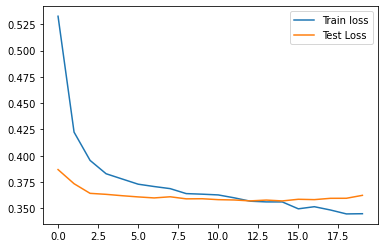

In [85]:
# Genero gráfico para visualizar la pérdida
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend();

Con lo anterior podemos reducir un poco más el sobre ajuste y evitar gastar más tiempo en entrenamiento.

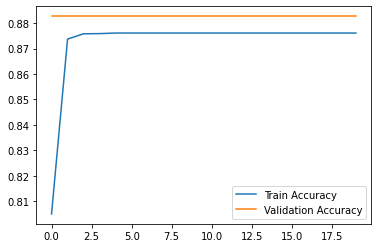

In [86]:
# Visualizar el accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend();



---

### 7. Choose a final model and justify your choice.

En mi concepto he decidido elegir el 3er modelo ejecutado, antes de generar la justificación me gustaria explorar dicho modelo con el uso de regularización.

### 8. Evaluate your final model with multiple metrics.

In [87]:
# Importo libreria requerida
from tensorflow.keras.regularizers import l2

# Primera capa oculta
model.add(Dense(10, # Numero de neuronas en la primera capa oculta
                input_dim = input_shape, # Forma de las características de entrada (número de columnas)
                activation = 'relu', # Tipo de función de activación utilizada
                kernel_regularizer=l2(0.01))) # Agregando regularización a una capa

# Segunda capa oculta
model.add(Dense(5, # Numero de neuronas en la segunda capa oculta
                activation = 'relu', # Tipo de función de activación utilizada
                kernel_regularizer=l2(0.01))) # Agregando regularización a una capa

# Tercera capa oculta
model.add(Dense(5, # Numero de neuronas en la segunda capa oculta
                activation = 'relu', # Tipo de función de activación utilizada
                kernel_regularizer=l2(0.01)))  # Agregando regularización a una capa
 
# Capa de salida
model.add(Dense(1, activation = 'sigmoid'))

# Genero la compilación del modelo
model.compile(loss = 'bce', optimizer = 'adam', metrics=['accuracy'])

# Ajustar el modelo a los datos
history_l2 = model.fit(X_train_pca, y_train, validation_data = (X_test_pca, y_test), epochs=25)

Epoch 1/25
421/421 [==============================] - 3s 4ms/step - loss: 0.5214 - accuracy: 0.8761 - val_loss: 0.3998 - val_accuracy: 0.8827
Epoch 2/25
421/421 [==============================] - 1s 3ms/step - loss: 0.3980 - accuracy: 0.8761 - val_loss: 0.3779 - val_accuracy: 0.8827
Epoch 3/25
421/421 [==============================] - 1s 3ms/step - loss: 0.3867 - accuracy: 0.8761 - val_loss: 0.3714 - val_accuracy: 0.8827
Epoch 4/25
421/421 [==============================] - 1s 3ms/step - loss: 0.3829 - accuracy: 0.8761 - val_loss: 0.3690 - val_accuracy: 0.8827
Epoch 5/25
421/421 [==============================] - 1s 3ms/step - loss: 0.3807 - accuracy: 0.8761 - val_loss: 0.3670 - val_accuracy: 0.8827
Epoch 6/25
421/421 [==============================] - 1s 3ms/step - loss: 0.3792 - accuracy: 0.8761 - val_loss: 0.3654 - val_accuracy: 0.8827
Epoch 7/25
421/421 [==============================] - 1s 3ms/step - loss: 0.3781 - accuracy: 0.8761 - val_loss: 0.3645 - val_accuracy: 0.8827
Epoch 

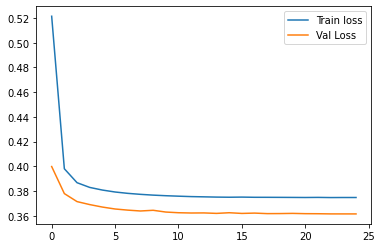

In [88]:
plt.plot(history_l2.history['loss'], label='Train loss')
plt.plot(history_l2.history['val_loss'], label='Val Loss')
plt.legend();

In [89]:
loss, acc = model.evaluate(X_test_pca, y_test,
                            batch_size=32)
print("Accuracy:", acc)

141/141 [==============================] - 0s 2ms/step - loss: 0.3614 - accuracy: 0.8827
Accuracy: 0.8827463388442993


Con lo anterior sigo observando como sigue teniendo un comportamiento optimo respecto a la reducción de perdidas en ambos conjuntos. Ya que la función de costo mediante la regularización impide que los pesos de una red neuronal tomen cualquier valor.

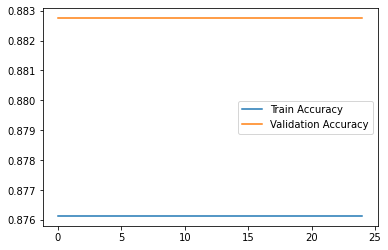

In [90]:
# Visualizar el accuracy
plt.plot(history_l2.history['accuracy'], label='Train Accuracy')
plt.plot(history_l2.history['val_accuracy'], label='Validation Accuracy')
plt.legend();

Se sigue manteniendo un valor de buen rendimiento respecto al accuracy. 

In [91]:
# Importo librerias requeridas
import sklearn
from sklearn.metrics import confusion_matrix,accuracy_score 
import mlxtend
from mlxtend.plotting import plot_confusion_matrix

141/141 [==============================] - 0s 2ms/step


(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc954900220>)

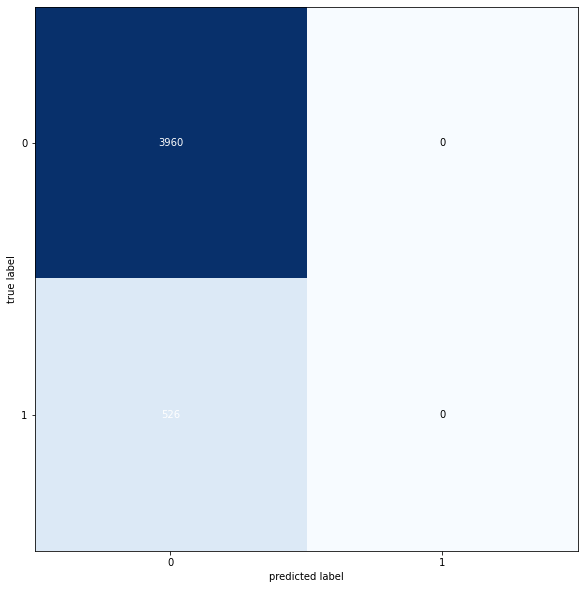

In [92]:
# Analizo el rendimiento a partir de una matriz de confusión
predicciones = model.predict(X_test_pca)
y_pred = np.argmax(predicciones, axis= 1)
mat = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat = mat, figsize= (10,10))

Vemos que al momento tenemos 3.960 Verdaderos Negativos, 526 de falsos negativos, 0 falsos positivos y 0 verdaderos positivos respectivamente.

<br>

Basandonos en que las predicciones correctas fueron 3.960 Verdaderos Negativos y 0 Verdaderos positivos. Las predicciones correctas fueron 3.960. **La precisión fue de 82.27%** (4486/3960 = 0,8827463218903255).

### 9. Based on those metrics, explain in writing how well your model will solve the business problem

Luego de analizar el comportamiento en el cambio de los diferentes parámetros para la aplicación de cada modelo. He notado las siguientes características:

* He visto que los modelos en gran medida cuando tienen más complejidad están más propensos al sobre ajuste, como fue el caso del modelo 1 y 2.
* El modelo 3 al momento de reducir las neuronas y épocas obtuvo un comportamiento mucho más suelto, permitiendo encontrar un equilibrio más óptimo orientando a un buen rendimiento. Como lo marca, su precisión del 82.7%.
* Para este ejercicio en especial sería interesante poder indagar más acerca del cómo poder tratar tantos datos duplicados, pues recordemos que el set de datos no tenía una organización por ID que permitiera identificar al cliente dentro del banco y de esta forma evitar tanta perdida de información al depurar.
* La exactitud de los modelos inicio de manera no óptima a pasar a números más ajustados al tratamiento que se realizó durante todo la pre limpieza y análisis.
* He decidido inclinarme por el último, el modelo 3, ya que me brinda una buena exactitud, aunque siento que puede mejorar. El modelo si me podría permitir tener una buena clasificación  entre los clientes del banco, junto con el cumplimiento de otros parámetros que se puedan imponer el banco para ofertar estos créditos. O sea, el modelo puede darnos una guía más clara de tomar la decisión, pero no está al 100% optimizado. Lo podriamos mejorar.